## Library

In [926]:
import math
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


def normal_sample(low, high, interval):
    if (low > high) or (high < low):
        raise ValueError
    if low == high:
        return low
    else:
        mu = (high + low) / 2
        cdf_value = 0.5 + 0.5 * interval
        normed_sigma = stats.norm.ppf(cdf_value)
        sigma = (high - mu) / normed_sigma
        return np.random.normal(mu, sigma)

    
def lognormal_sample(low, high, interval):
    if (low > high) or (high < low):
        raise ValueError
    if low == high:
        return low
    else:
        log_low = np.log(low)
        log_high = np.log(high)
        mu = (log_high + log_low) / 2
        cdf_value = 0.5 + 0.5 * interval
        normed_sigma = stats.norm.ppf(cdf_value)
        sigma = (log_high - mu) / normed_sigma
        return np.random.lognormal(mu, sigma)
    

def norm(x, y):
    return [x, y]

def norm_lclip(x, y):
    return [x, y, 'norm-lclip']

def lognorm(x, y):
    return [x, y, 'log']

def lognorm_lclip(x, y):
    return [x, y, 'log-lclip']

def sample(var):
    if len(var) > 2:
        if var[2] == 'log':
            return lognormal_sample(var[0], var[1], CREDIBILITY_INTERVAL)
        elif var[2] == 'log-lclip':
            out = lognormal_sample(var[0], var[1], CREDIBILITY_INTERVAL)
            if out < var[0]:
                return var[0]
            else:
                return out
        elif var[2] == 'norm-lclip':
            out = normal_sample(var[0], var[1], CREDIBILITY_INTERVAL)
            if out < var[0]:
                return var[0]
            else:
                return out
        else:
            raise ValueError
    else:
        return normal_sample(var[0], var[1], CREDIBILITY_INTERVAL)


def numerize(oom_num):
    oom_num = int(oom_num)
    ooms = ['thousand', 'million', 'billion', 'trillion', 'quadrillion', 'quintillion', 'sextillion', 'septillion', 'octillion', 'nonillion', 'decillion']

    if oom_num == 0:
        return 'one'
    elif oom_num == 1:
        return 'ten'
    elif oom_num == 2:
        return 'hundred'
    elif oom_num > 35:
        return numerize(oom_num - 33) + ' decillion'
    elif oom_num < 0:
        return 'negative ' + numerize(-oom_num)
    elif oom_num % 3 == 0:
        return 'one ' + ooms[(oom_num // 3) - 1]
    else:
        return str(10 ** (oom_num % 3)) + ' ' + ooms[(oom_num // 3) - 1]


def params_to_gb(params):
    gb = np.round(params * (4 / billion))
    if gb >= 1000:
        tb = np.round(gb / 1000)
    else:
        return str(gb) + ' GB'
    
    if tb >= 1000:
        pb = np.round(tb / 1000)
    else:
        return str(tb) + ' TB'

    if pb >= 10000:
        return numerize(math.log10(pb)) + ' PB'
    else:
        return str(pb) + ' PB'
    

def get_percentiles(data, percentiles=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95]):
    return dict(list(zip(percentiles, np.percentile(data, percentiles))))


million = 1000000                   # 10^6
billion = 1000 * million            # 10^9
trillion = 1000 * billion           # 10^12
quadrillion = 1000 * trillion       # 10^15
quintillion = 1000 * quadrillion    # 10^18
sextillion = 1000 * quintillion     # 10^21
septillion = 1000 * sextillion      # 10^24
octillion = 1000 * septillion       # 10^27
nonillion = 1000 * octillion        # 10^30
decillion = 1000 * nonillion        # 10^33
    
print('Loaded')



Loaded


## Variables

In [927]:
RUNS = 1000
CURRENT_YEAR = 2022
MAX_YEAR = 2100
USE_NUMBERS = 'Ajeya'

years = list(range(CURRENT_YEAR, MAX_YEAR))

initial_gdp = 21.3 * trillion

if USE_NUMBERS == 'Ajeya':
    CREDIBILITY_INTERVAL = 0.9
    tai_flop_size = norm(14, 18)                    # 90% CI - at how many inference FLOPS would we get transformative capabilities? In 10^X FLOPS for inference
    train_inference_ratio = lognorm_lclip(11, 28.5) # 90% CI, if an algorithm does Y FLOPS of inference it will take 10^H * 10^X * Y FLOPS to train it
    algo_doubling_rate = norm(2.5, 2.5)
    initial_flops_per_dollar = norm(17, 17)
    flops_halving_rate = norm(3, 3)
    max_flops_per_dollar = norm(24, 24)
    initial_pay = norm(8, 8)
    gdp_growth = norm(1.03, 1.03)
    max_gdp_frac = norm(0.01, 0.01)
    spend_doubling_time = norm(2.5, 2.5)
    
elif USE_NUMBERS == 'Peter':
    CREDIBILITY_INTERVAL = 0.8
    tai_flop_size = lognorm(13, 21)
    train_inference_ratio = lognorm(12, 26)
    algo_doubling_rate = lognorm(2, 4)
    initial_flops_per_dollar = norm(17, 18)
    flops_halving_rate = lognorm(2, 4)
    max_flops_per_dollar = norm(24, 26)
    initial_pay = norm(8, 9)
    gdp_growth = norm(1.01, 1.03)
    max_gdp_frac = norm_lclip(0.01, 0.02)
    spend_doubling_time = lognorm(2, 4)

print('Loaded')


Loaded


In [928]:
percentiles = get_percentiles([sample(tai_flop_size) for s in range(100)])
tai_flop_size_50 = percentiles[50]
percentiles

{5: 13.952055138048351,
 10: 14.440308320430862,
 20: 14.951704893283566,
 30: 15.322560548057458,
 40: 15.639457854371173,
 50: 15.929109599897636,
 60: 16.19536576778204,
 70: 16.428643584994465,
 80: 16.72700247497161,
 90: 17.370071662747716,
 95: 17.83955633180376}

In [929]:
percentiles = get_percentiles([sample(train_inference_ratio) for s in range(100)])
train_inference_ratio_50 = percentiles[50]
percentiles

{5: 11.689116851159357,
 10: 12.779545319219277,
 20: 13.722140258936095,
 30: 14.767404427850465,
 40: 15.787695025990129,
 50: 17.230646462528696,
 60: 18.558643855383533,
 70: 20.550977517753328,
 80: 21.544698302999038,
 90: 23.394124742345767,
 95: 25.46062185027659}

In [930]:
percentiles = get_percentiles([sample(tai_flop_size) + sample(train_inference_ratio) for s in range(100)])
initial_flops_50 = percentiles[50]
percentiles

{5: 27.339703183127526,
 10: 28.883668706989567,
 20: 30.822727056628334,
 30: 32.284017641072396,
 40: 33.14928493328956,
 50: 34.19730068180417,
 60: 34.74286680842599,
 70: 35.71575651379788,
 80: 37.220088884824825,
 90: 39.19916959607814,
 95: 43.29227947605595}

In [931]:
percentiles = get_percentiles([sample(algo_doubling_rate) for s in range(100)])
algo_doubling_rate_50 = percentiles[50]
percentiles

{5: 2.5,
 10: 2.5,
 20: 2.5,
 30: 2.5,
 40: 2.5,
 50: 2.5,
 60: 2.5,
 70: 2.5,
 80: 2.5,
 90: 2.5,
 95: 2.5}

In [932]:
percentiles = get_percentiles([sample(initial_flops_per_dollar) for s in range(100)])
initial_flops_per_dollar_50 = percentiles[50]
percentiles

{5: 17.0,
 10: 17.0,
 20: 17.0,
 30: 17.0,
 40: 17.0,
 50: 17.0,
 60: 17.0,
 70: 17.0,
 80: 17.0,
 90: 17.0,
 95: 17.0}

In [933]:
percentiles = get_percentiles([sample(flops_halving_rate) for s in range(100)])
flops_halving_rate_50 = percentiles[50]
percentiles

{5: 3.0,
 10: 3.0,
 20: 3.0,
 30: 3.0,
 40: 3.0,
 50: 3.0,
 60: 3.0,
 70: 3.0,
 80: 3.0,
 90: 3.0,
 95: 3.0}

In [934]:
percentiles = get_percentiles([sample(max_flops_per_dollar) for s in range(100)])
max_flops_per_dollar_50 = percentiles[50]
percentiles

{5: 24.0,
 10: 24.0,
 20: 24.0,
 30: 24.0,
 40: 24.0,
 50: 24.0,
 60: 24.0,
 70: 24.0,
 80: 24.0,
 90: 24.0,
 95: 24.0}

In [935]:
percentiles = get_percentiles([sample(initial_pay) for s in range(100)])
initial_pay_50 = percentiles[50]
percentiles

{5: 8.0,
 10: 8.0,
 20: 8.0,
 30: 8.0,
 40: 8.0,
 50: 8.0,
 60: 8.0,
 70: 8.0,
 80: 8.0,
 90: 8.0,
 95: 8.0}

In [936]:
percentiles = get_percentiles([sample(gdp_growth) for s in range(100)])
gdp_growth_50 = percentiles[50]
percentiles

{5: 1.03,
 10: 1.03,
 20: 1.03,
 30: 1.03,
 40: 1.03,
 50: 1.03,
 60: 1.03,
 70: 1.03,
 80: 1.03,
 90: 1.03,
 95: 1.03}

In [937]:
percentiles = get_percentiles([sample(max_gdp_frac) for s in range(100)])
max_gdp_frac_50 = percentiles[50]
percentiles

{5: 0.01,
 10: 0.010000000000000002,
 20: 0.01,
 30: 0.01,
 40: 0.01,
 50: 0.01,
 60: 0.01,
 70: 0.01,
 80: 0.010000000000000002,
 90: 0.01,
 95: 0.01}

In [938]:
percentiles = get_percentiles([sample(spend_doubling_time) for s in range(100)])
spend_doubling_time_50 = percentiles[50]
percentiles

{5: 2.5,
 10: 2.5,
 20: 2.5,
 30: 2.5,
 40: 2.5,
 50: 2.5,
 60: 2.5,
 70: 2.5,
 80: 2.5,
 90: 2.5,
 95: 2.5}

## GDP Over Time

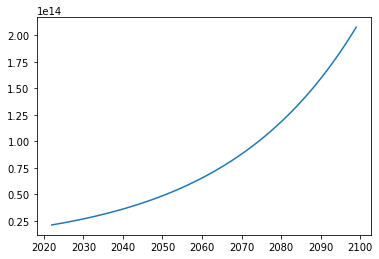

In [939]:
def gdp(initial_gdp, gdp_growth, year):
    return initial_gdp * (gdp_growth ** year)

gdp_ = np.array([gdp(initial_gdp=initial_gdp, gdp_growth=gdp_growth_50, year=(y - CURRENT_YEAR)) for y in years])
plt.plot(years, gdp_)

In [940]:
for y in years:
    print('Year: {} - GDP log$ {} ({})'.format(y,
                                               np.round(np.log10(gdp_[y - CURRENT_YEAR]), 1),
                                               numerize(np.log10(gdp_[y - CURRENT_YEAR]))))
    

Year: 2022 - GDP log$ 13.3 (10 trillion)
Year: 2023 - GDP log$ 13.3 (10 trillion)
Year: 2024 - GDP log$ 13.4 (10 trillion)
Year: 2025 - GDP log$ 13.4 (10 trillion)
Year: 2026 - GDP log$ 13.4 (10 trillion)
Year: 2027 - GDP log$ 13.4 (10 trillion)
Year: 2028 - GDP log$ 13.4 (10 trillion)
Year: 2029 - GDP log$ 13.4 (10 trillion)
Year: 2030 - GDP log$ 13.4 (10 trillion)
Year: 2031 - GDP log$ 13.4 (10 trillion)
Year: 2032 - GDP log$ 13.5 (10 trillion)
Year: 2033 - GDP log$ 13.5 (10 trillion)
Year: 2034 - GDP log$ 13.5 (10 trillion)
Year: 2035 - GDP log$ 13.5 (10 trillion)
Year: 2036 - GDP log$ 13.5 (10 trillion)
Year: 2037 - GDP log$ 13.5 (10 trillion)
Year: 2038 - GDP log$ 13.5 (10 trillion)
Year: 2039 - GDP log$ 13.5 (10 trillion)
Year: 2040 - GDP log$ 13.6 (10 trillion)
Year: 2041 - GDP log$ 13.6 (10 trillion)
Year: 2042 - GDP log$ 13.6 (10 trillion)
Year: 2043 - GDP log$ 13.6 (10 trillion)
Year: 2044 - GDP log$ 13.6 (10 trillion)
Year: 2045 - GDP log$ 13.6 (10 trillion)
Year: 2046 - GDP

## Willingness to Pay Over Time

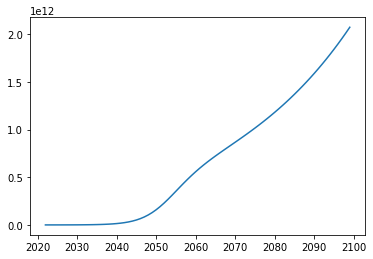

In [941]:
def willingness_to_pay(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac, year):
    gdp_ = gdp(initial_gdp=initial_gdp, gdp_growth=gdp_growth, year=year)
    return 10 ** (np.log10(initial_pay) +
                  np.log10(math.exp(np.log(2)/spend_doubling_time * year)) -
                  np.log10(1 + initial_pay / (gdp_ * max_gdp_frac) * math.exp(np.log(2)/spend_doubling_time * year)))

willingness = np.array([willingness_to_pay(initial_gdp=initial_gdp,
                                           gdp_growth=gdp_growth_50,
                                           initial_pay=10 ** initial_pay_50,
                                           spend_doubling_time=spend_doubling_time_50,
                                           max_gdp_frac=max_gdp_frac_50,
                                           year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, willingness)


In [942]:
for y in years:
    print('Year: {} - willingness log$ {} ({})'.format(y,
                                                       np.round(np.log10(willingness[y - CURRENT_YEAR]), 1),
                                                       numerize(np.log10(willingness[y - CURRENT_YEAR]))))

Year: 2022 - willingness log$ 8.0 (10 million)
Year: 2023 - willingness log$ 8.1 (100 million)
Year: 2024 - willingness log$ 8.2 (100 million)
Year: 2025 - willingness log$ 8.4 (100 million)
Year: 2026 - willingness log$ 8.5 (100 million)
Year: 2027 - willingness log$ 8.6 (100 million)
Year: 2028 - willingness log$ 8.7 (100 million)
Year: 2029 - willingness log$ 8.8 (100 million)
Year: 2030 - willingness log$ 9.0 (100 million)
Year: 2031 - willingness log$ 9.1 (one billion)
Year: 2032 - willingness log$ 9.2 (one billion)
Year: 2033 - willingness log$ 9.3 (one billion)
Year: 2034 - willingness log$ 9.4 (one billion)
Year: 2035 - willingness log$ 9.6 (one billion)
Year: 2036 - willingness log$ 9.7 (one billion)
Year: 2037 - willingness log$ 9.8 (one billion)
Year: 2038 - willingness log$ 9.9 (one billion)
Year: 2039 - willingness log$ 10.0 (10 billion)
Year: 2040 - willingness log$ 10.2 (10 billion)
Year: 2041 - willingness log$ 10.3 (10 billion)
Year: 2042 - willingness log$ 10.4 (10 bi

## FLOPs Needed to Make TAI (Given Algorithmic Progress)

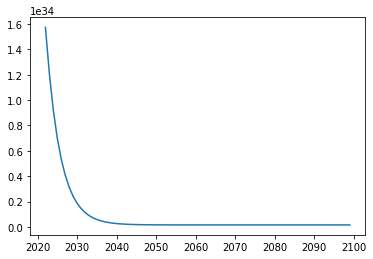

In [943]:
def flops_needed(initial_flops, doubling_rate, year):
    return 10 ** (math.log10(initial_flops) - max(math.log10(math.exp((np.log(2) / doubling_rate) * year)) -
                                                  math.log10(1 + (1/100) * math.exp((np.log(2) / doubling_rate) * year)), 0))

flops_ = np.array([flops_needed(initial_flops=10 ** initial_flops_50,
                                doubling_rate=algo_doubling_rate_50,
                                year=(y - CURRENT_YEAR)) for y in years])
plt.plot(years, flops_)


In [944]:
for y in years:
    print('Year: {} - log FLOPS needed for TAI {} ({})'.format(y,
                                                               np.round(np.log10(flops_[y - CURRENT_YEAR]), 1),
                                                               numerize(np.log10(flops_[y - CURRENT_YEAR]))))

Year: 2022 - log FLOPS needed for TAI 34.2 (10 decillion)
Year: 2023 - log FLOPS needed for TAI 34.1 (10 decillion)
Year: 2024 - log FLOPS needed for TAI 34.0 (one decillion)
Year: 2025 - log FLOPS needed for TAI 33.8 (one decillion)
Year: 2026 - log FLOPS needed for TAI 33.7 (one decillion)
Year: 2027 - log FLOPS needed for TAI 33.6 (one decillion)
Year: 2028 - log FLOPS needed for TAI 33.5 (one decillion)
Year: 2029 - log FLOPS needed for TAI 33.4 (one decillion)
Year: 2030 - log FLOPS needed for TAI 33.3 (one decillion)
Year: 2031 - log FLOPS needed for TAI 33.2 (one decillion)
Year: 2032 - log FLOPS needed for TAI 33.1 (one decillion)
Year: 2033 - log FLOPS needed for TAI 33.0 (100 nonillion)
Year: 2034 - log FLOPS needed for TAI 32.9 (100 nonillion)
Year: 2035 - log FLOPS needed for TAI 32.8 (100 nonillion)
Year: 2036 - log FLOPS needed for TAI 32.7 (100 nonillion)
Year: 2037 - log FLOPS needed for TAI 32.6 (100 nonillion)
Year: 2038 - log FLOPS needed for TAI 32.5 (100 nonillion)

## FLOPs per Dollar (Given Declining Costs)

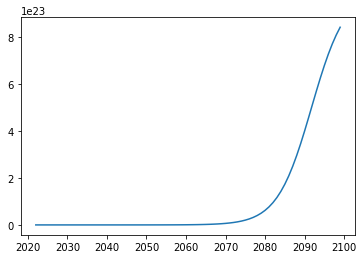

In [945]:
def flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, halving_rate, year):
    return 10 ** (np.log10(initial_flops_per_dollar) +
                  np.log10(math.exp(np.log(2) / halving_rate * year)) -
                  np.log10(1 + initial_flops_per_dollar / max_flops_per_dollar * math.exp(np.log(2) / halving_rate * year)))

flops_per_dollar_ = np.array([flops_per_dollar(initial_flops_per_dollar=10 ** initial_flops_per_dollar_50,
                                               max_flops_per_dollar=10 ** max_flops_per_dollar_50,
                                               halving_rate=flops_halving_rate_50,
                                               year=(y - CURRENT_YEAR)) for y in years])
plt.plot(years, flops_per_dollar_)


In [946]:
for y in years:
    print('Year: {} - log {} FLOPS per $ ({})'.format(y,
                                                      np.round(np.log10(flops_per_dollar_[y - CURRENT_YEAR]), 1),
                                                      numerize(np.log10(flops_per_dollar_[y - CURRENT_YEAR]))))

Year: 2022 - log 17.0 FLOPS per $ (10 quadrillion)
Year: 2023 - log 17.1 FLOPS per $ (100 quadrillion)
Year: 2024 - log 17.2 FLOPS per $ (100 quadrillion)
Year: 2025 - log 17.3 FLOPS per $ (100 quadrillion)
Year: 2026 - log 17.4 FLOPS per $ (100 quadrillion)
Year: 2027 - log 17.5 FLOPS per $ (100 quadrillion)
Year: 2028 - log 17.6 FLOPS per $ (100 quadrillion)
Year: 2029 - log 17.7 FLOPS per $ (100 quadrillion)
Year: 2030 - log 17.8 FLOPS per $ (100 quadrillion)
Year: 2031 - log 17.9 FLOPS per $ (100 quadrillion)
Year: 2032 - log 18.0 FLOPS per $ (one quintillion)
Year: 2033 - log 18.1 FLOPS per $ (one quintillion)
Year: 2034 - log 18.2 FLOPS per $ (one quintillion)
Year: 2035 - log 18.3 FLOPS per $ (one quintillion)
Year: 2036 - log 18.4 FLOPS per $ (one quintillion)
Year: 2037 - log 18.5 FLOPS per $ (one quintillion)
Year: 2038 - log 18.6 FLOPS per $ (one quintillion)
Year: 2039 - log 18.7 FLOPS per $ (one quintillion)
Year: 2040 - log 18.8 FLOPS per $ (one quintillion)
Year: 2041 - 

## Dollars Needed to Buy TAI (Given Algorithmic Progress and Decline in Cost per FLOP)

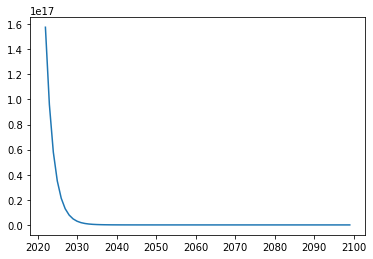

In [947]:
def cost_of_tai(initial_flops, algo_doubling_rate, initial_flops_per_dollar, max_flops_per_dollar,
                flops_halving_rate, year):
    return (flops_needed(initial_flops, algo_doubling_rate, year) /
            flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year))

cost_of_tai_ = np.array([cost_of_tai(initial_flops=10 ** initial_flops_50,
                                     algo_doubling_rate=algo_doubling_rate_50,
                                     initial_flops_per_dollar=10 ** initial_flops_per_dollar_50,
                                     max_flops_per_dollar=10 ** max_flops_per_dollar_50,
                                     flops_halving_rate=flops_halving_rate_50,
                                     year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, cost_of_tai_)


In [948]:
for y in years:
    print('Year: {} - log $ {} to buy TAI ({})'.format(y,
                                                       np.round(np.log10(cost_of_tai_[y - CURRENT_YEAR]), 1),
                                                       numerize(np.log10(cost_of_tai_[y - CURRENT_YEAR]))))

Year: 2022 - log $ 17.2 to buy TAI (100 quadrillion)
Year: 2023 - log $ 17.0 to buy TAI (10 quadrillion)
Year: 2024 - log $ 16.8 to buy TAI (10 quadrillion)
Year: 2025 - log $ 16.5 to buy TAI (10 quadrillion)
Year: 2026 - log $ 16.3 to buy TAI (10 quadrillion)
Year: 2027 - log $ 16.1 to buy TAI (10 quadrillion)
Year: 2028 - log $ 15.9 to buy TAI (one quadrillion)
Year: 2029 - log $ 15.7 to buy TAI (one quadrillion)
Year: 2030 - log $ 15.5 to buy TAI (one quadrillion)
Year: 2031 - log $ 15.3 to buy TAI (one quadrillion)
Year: 2032 - log $ 15.1 to buy TAI (one quadrillion)
Year: 2033 - log $ 14.9 to buy TAI (100 trillion)
Year: 2034 - log $ 14.7 to buy TAI (100 trillion)
Year: 2035 - log $ 14.5 to buy TAI (100 trillion)
Year: 2036 - log $ 14.3 to buy TAI (100 trillion)
Year: 2037 - log $ 14.1 to buy TAI (100 trillion)
Year: 2038 - log $ 13.9 to buy TAI (10 trillion)
Year: 2039 - log $ 13.8 to buy TAI (10 trillion)
Year: 2040 - log $ 13.6 to buy TAI (10 trillion)
Year: 2041 - log $ 13.5 t

## FLOPs at Max Spend

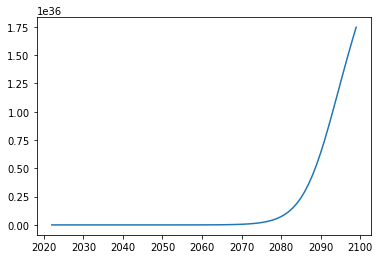

In [949]:
def flops_at_max(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac,
                 initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year):
    return (willingness_to_pay(initial_gdp=initial_gdp,
                                           gdp_growth=gdp_growth,
                                           initial_pay=initial_pay,
                                           spend_doubling_time=spend_doubling_time,
                                           max_gdp_frac=0.01,
                                           year=year) *
            flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year))

flops_at_max_ = np.array([flops_at_max(initial_gdp=initial_gdp,
                                       gdp_growth=gdp_growth_50,
                                       initial_pay=10 ** initial_pay_50,
                                       spend_doubling_time=spend_doubling_time_50,
                                       max_gdp_frac=max_gdp_frac_50,
                                       initial_flops_per_dollar=10 ** initial_flops_per_dollar_50,
                                       max_flops_per_dollar=10 ** max_flops_per_dollar_50,
                                       flops_halving_rate=flops_halving_rate_50,
                                       year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, flops_at_max_)


In [950]:
for y in years:
    print('Year: {} - max log FLOPS {} ({})'.format(y,
                                                    np.round(np.log10(flops_at_max_[y - CURRENT_YEAR]), 1),
                                                    numerize(np.log10(flops_at_max_[y - CURRENT_YEAR]))))

Year: 2022 - max log FLOPS 25.0 (one septillion)
Year: 2023 - max log FLOPS 25.2 (10 septillion)
Year: 2024 - max log FLOPS 25.4 (10 septillion)
Year: 2025 - max log FLOPS 25.7 (10 septillion)
Year: 2026 - max log FLOPS 25.9 (10 septillion)
Year: 2027 - max log FLOPS 26.1 (100 septillion)
Year: 2028 - max log FLOPS 26.3 (100 septillion)
Year: 2029 - max log FLOPS 26.5 (100 septillion)
Year: 2030 - max log FLOPS 26.8 (100 septillion)
Year: 2031 - max log FLOPS 27.0 (100 septillion)
Year: 2032 - max log FLOPS 27.2 (one octillion)
Year: 2033 - max log FLOPS 27.4 (one octillion)
Year: 2034 - max log FLOPS 27.6 (one octillion)
Year: 2035 - max log FLOPS 27.9 (one octillion)
Year: 2036 - max log FLOPS 28.1 (10 octillion)
Year: 2037 - max log FLOPS 28.3 (10 octillion)
Year: 2038 - max log FLOPS 28.5 (10 octillion)
Year: 2039 - max log FLOPS 28.7 (10 octillion)
Year: 2040 - max log FLOPS 29.0 (10 octillion)
Year: 2041 - max log FLOPS 29.2 (100 octillion)
Year: 2042 - max log FLOPS 29.4 (100 oc

## Max # of Parameters

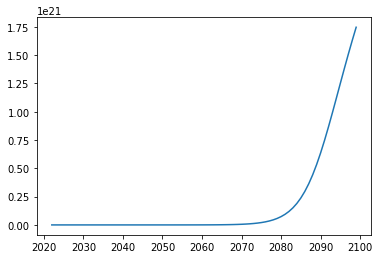

In [951]:
def params_at_max(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac,
                  initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year):
    return flops_at_max(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac,
                        initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year) / quadrillion

params_at_max_ = np.array([params_at_max(initial_gdp=initial_gdp,
                                         gdp_growth=gdp_growth_50,
                                         initial_pay=10 ** initial_pay_50,
                                         spend_doubling_time=spend_doubling_time_50,
                                         max_gdp_frac=max_gdp_frac_50,
                                         initial_flops_per_dollar=10 ** initial_flops_per_dollar_50,
                                         max_flops_per_dollar=10 ** max_flops_per_dollar_50,
                                         flops_halving_rate=flops_halving_rate_50,
                                         year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, params_at_max_)


In [952]:
for y in years:
    print('Year: {} - max log params {} ({})'.format(y,
                                                     np.round(np.log10(params_at_max_[y - CURRENT_YEAR]), 1),
                                                     numerize(np.log10(params_at_max_[y - CURRENT_YEAR]))))

Year: 2022 - max log params 10.0 (one billion)
Year: 2023 - max log params 10.2 (10 billion)
Year: 2024 - max log params 10.4 (10 billion)
Year: 2025 - max log params 10.7 (10 billion)
Year: 2026 - max log params 10.9 (10 billion)
Year: 2027 - max log params 11.1 (100 billion)
Year: 2028 - max log params 11.3 (100 billion)
Year: 2029 - max log params 11.5 (100 billion)
Year: 2030 - max log params 11.8 (100 billion)
Year: 2031 - max log params 12.0 (100 billion)
Year: 2032 - max log params 12.2 (one trillion)
Year: 2033 - max log params 12.4 (one trillion)
Year: 2034 - max log params 12.6 (one trillion)
Year: 2035 - max log params 12.9 (one trillion)
Year: 2036 - max log params 13.1 (10 trillion)
Year: 2037 - max log params 13.3 (10 trillion)
Year: 2038 - max log params 13.5 (10 trillion)
Year: 2039 - max log params 13.7 (10 trillion)
Year: 2040 - max log params 14.0 (10 trillion)
Year: 2041 - max log params 14.2 (100 trillion)
Year: 2042 - max log params 14.4 (100 trillion)
Year: 2043 

## Model Size at Max

In [953]:
for y in years:
    print('Year: {} - max model size {} log bytes ({})'.format(y,
                                                               np.round(math.log10(params_at_max_[y - CURRENT_YEAR] / 4), 1),
                                                               params_to_gb(params_at_max_[y - CURRENT_YEAR])))
          

Year: 2022 - max model size 9.4 log bytes (40.0 GB)
Year: 2023 - max model size 9.6 log bytes (66.0 GB)
Year: 2024 - max model size 9.8 log bytes (110.0 GB)
Year: 2025 - max model size 10.1 log bytes (184.0 GB)
Year: 2026 - max model size 10.3 log bytes (305.0 GB)
Year: 2027 - max model size 10.5 log bytes (507.0 GB)
Year: 2028 - max model size 10.7 log bytes (843.0 GB)
Year: 2029 - max model size 10.9 log bytes (1.0 TB)
Year: 2030 - max model size 11.2 log bytes (2.0 TB)
Year: 2031 - max model size 11.4 log bytes (4.0 TB)
Year: 2032 - max model size 11.6 log bytes (6.0 TB)
Year: 2033 - max model size 11.8 log bytes (11.0 TB)
Year: 2034 - max model size 12.0 log bytes (18.0 TB)
Year: 2035 - max model size 12.3 log bytes (29.0 TB)
Year: 2036 - max model size 12.5 log bytes (49.0 TB)
Year: 2037 - max model size 12.7 log bytes (80.0 TB)
Year: 2038 - max model size 12.9 log bytes (133.0 TB)
Year: 2039 - max model size 13.1 log bytes (219.0 TB)
Year: 2040 - max model size 13.4 log bytes (36

## Data Size at Max

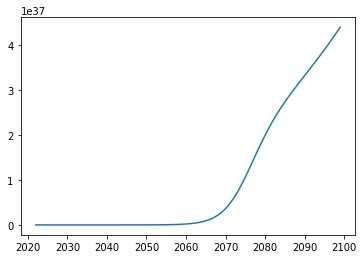

In [954]:
def tokens_at_max(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac,
                  initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year):
    return flops_at_max(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac,
                        initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year) * 21.2

tokens_at_max_ = np.array([tokens_at_max(initial_gdp=initial_gdp,
                                         gdp_growth=1.03,
                                         initial_pay=billion,
                                         spend_doubling_time=2.5,
                                         max_gdp_frac=0.01,
                                         initial_flops_per_dollar=400 * quadrillion,
                                         max_flops_per_dollar=septillion,
                                         flops_halving_rate=2.5,
                                         year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, tokens_at_max_)


In [955]:
for y in years:
    print('Year: {} - max log tokens {} ({})'.format(y,
                                                     np.round(np.log10(params_at_max_[y - CURRENT_YEAR]), 1),
                                                     numerize(np.log10(params_at_max_[y - CURRENT_YEAR]))))

Year: 2022 - max log tokens 10.0 (one billion)
Year: 2023 - max log tokens 10.2 (10 billion)
Year: 2024 - max log tokens 10.4 (10 billion)
Year: 2025 - max log tokens 10.7 (10 billion)
Year: 2026 - max log tokens 10.9 (10 billion)
Year: 2027 - max log tokens 11.1 (100 billion)
Year: 2028 - max log tokens 11.3 (100 billion)
Year: 2029 - max log tokens 11.5 (100 billion)
Year: 2030 - max log tokens 11.8 (100 billion)
Year: 2031 - max log tokens 12.0 (100 billion)
Year: 2032 - max log tokens 12.2 (one trillion)
Year: 2033 - max log tokens 12.4 (one trillion)
Year: 2034 - max log tokens 12.6 (one trillion)
Year: 2035 - max log tokens 12.9 (one trillion)
Year: 2036 - max log tokens 13.1 (10 trillion)
Year: 2037 - max log tokens 13.3 (10 trillion)
Year: 2038 - max log tokens 13.5 (10 trillion)
Year: 2039 - max log tokens 13.7 (10 trillion)
Year: 2040 - max log tokens 14.0 (10 trillion)
Year: 2041 - max log tokens 14.2 (100 trillion)
Year: 2042 - max log tokens 14.4 (100 trillion)
Year: 2043 

## Cost of TAI vs. Willingness to Pay

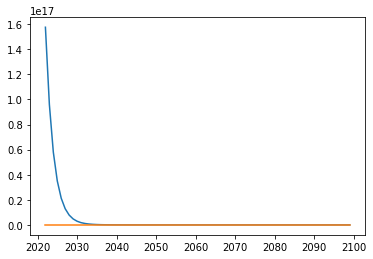

In [956]:
plt.plot(years, cost_of_tai_)
plt.plot(years, willingness)

In [957]:
for y in years:
    print('Year: {} - log $ {} to buy TAI ({}) vs. willingness to pay log $ {} ({}) - TAI? {}'.format(y,
                                                                                                      np.round(np.log10(cost_of_tai_[y - CURRENT_YEAR]), 1),
                                                                                                      numerize(np.log10(cost_of_tai_[y - CURRENT_YEAR])),
                                                                                                      np.round(np.log10(willingness[y - CURRENT_YEAR]), 1),
                                                                                                      numerize(np.log10(willingness[y - CURRENT_YEAR])),
                                                                                                      cost_of_tai_[y - CURRENT_YEAR] <= willingness[y - CURRENT_YEAR]))
 

Year: 2022 - log $ 17.2 to buy TAI (100 quadrillion) vs. willingness to pay log $ 8.0 (10 million) - TAI? False
Year: 2023 - log $ 17.0 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.1 (100 million) - TAI? False
Year: 2024 - log $ 16.8 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.2 (100 million) - TAI? False
Year: 2025 - log $ 16.5 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.4 (100 million) - TAI? False
Year: 2026 - log $ 16.3 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.5 (100 million) - TAI? False
Year: 2027 - log $ 16.1 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.6 (100 million) - TAI? False
Year: 2028 - log $ 15.9 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.7 (100 million) - TAI? False
Year: 2029 - log $ 15.7 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.8 (100 million) - TAI? False
Year: 2030 - log $ 15.5 to buy TAI (one quadrillion) vs. willingness to pay log $ 9.0 (100 million) - 

## Run Model

In [958]:
tai_years = []

for r in range(RUNS):
    print('## RUN {}/{} ##'.format(r + 1, RUNS))
    tai_flop_size_ = sample(tai_flop_size)
    train_inference_ratio_ = sample(train_inference_ratio)
    initial_flops_ = 10 ** (tai_flop_size_ + train_inference_ratio_)
    algo_doubling_rate_ = sample(algo_doubling_rate)
    initial_flops_per_dollar_ = 10 ** sample(initial_flops_per_dollar)
    flops_halving_rate_ = sample(flops_halving_rate)
    max_flops_per_dollar_ = 10 ** sample(max_flops_per_dollar)
    initial_pay_ = 10 ** sample(initial_pay)
    gdp_growth_ = sample(gdp_growth)
    max_gdp_frac_ = sample(max_gdp_frac)
    spend_doubling_time_ = sample(spend_doubling_time)
    
    diagnostic = 'Diagnostic: tai_flop_size={}, train_inference_ratio={}, initial_flops={}, algo_doubling_rate={}, '
    diagnostic += 'initial_flops_per_dollar={}, flops_halving_rate={}, max_flops_per_dollar={}, '
    diagnostic += 'initial_pay={}, gdp_growth={}, max_gdp_frac={}, spend_doubling_time={}'
    print(diagnostic.format(tai_flop_size_, train_inference_ratio_, initial_flops_, algo_doubling_rate_,
                            initial_flops_per_dollar_, flops_halving_rate_, max_flops_per_dollar_,
                            initial_pay_, gdp_growth_, max_gdp_frac_, spend_doubling_time_))
    print('-')
    
    print('It takes {} log inference FLOPS ({}) - {} parameters - for transformative capabilities.'.format(np.round(tai_flop_size_, 1),
                                                                                                           numerize(tai_flop_size_),
                                                                                                           numerize(tai_flop_size_ - 1)))
    print('An algorithm doing Y log FLOPS of inference takes {} * Y log FLOPS ({} * Y) to train.'.format(np.round(train_inference_ratio_, 1), numerize(train_inference_ratio_)))
    print('Thus we expect to need {} log FLOPS ({}) to train a transformative AI.'.format(np.round(math.log10(initial_flops_), 1), numerize(math.log10(initial_flops_))))
    print('Every {} years algorithms get 2x better'.format(np.round(algo_doubling_rate_, 1)))
    print(('FLOPS start at a cost of {} log FLOPS ({}) per $. Every {} years they get ' +
           '2x cheaper, to a maximum of {} log FLOPS ({}) per $.').format(np.round(math.log10(initial_flops_per_dollar_), 1),
                                                                          numerize(math.log10(initial_flops_per_dollar_)),
                                                                          np.round(flops_halving_rate_, 1),
                                                                          np.round(math.log10(max_flops_per_dollar_), 1),
                                                                          numerize(math.log10(max_flops_per_dollar_))))
    print(('We are willing to pay {} log $ ({}) and this increases by {}x per year to a max of {}% of GDP. ' +
           'GDP grows at a rate of {}x per year.').format(np.round(math.log10(initial_pay_), 1),
                                                          numerize(math.log10(initial_pay_)),
                                                          np.round(spend_doubling_time_, 1),
                                                          np.round(max_gdp_frac_, 4),
                                                          np.round(gdp_growth_, 3)))
    print('---')
    
    cost_of_tai_ = np.array([cost_of_tai(initial_flops=initial_flops_,
                                         algo_doubling_rate=algo_doubling_rate_,
                                         initial_flops_per_dollar=initial_flops_per_dollar_,
                                         max_flops_per_dollar=max_flops_per_dollar_,
                                         flops_halving_rate=flops_halving_rate_,
                                         year=(y - CURRENT_YEAR)) for y in years])
    
    willingness = np.array([willingness_to_pay(initial_gdp=initial_gdp,
                                               gdp_growth=gdp_growth_,
                                               initial_pay=initial_pay_,
                                               spend_doubling_time=spend_doubling_time_,
                                               max_gdp_frac=max_gdp_frac_,
                                               year=(y - CURRENT_YEAR)) for y in years])
    
    total_compute_ = np.array([flops_at_max(initial_gdp=initial_gdp,
                                            gdp_growth=gdp_growth_,
                                            initial_pay=initial_pay_,
                                            spend_doubling_time=spend_doubling_time_,
                                            max_gdp_frac=max_gdp_frac_,
                                            initial_flops_per_dollar=initial_flops_per_dollar_,
                                            max_flops_per_dollar=max_flops_per_dollar_,
                                            flops_halving_rate=flops_halving_rate_,
                                            year=(y - CURRENT_YEAR)) for y in years])
    
    flops_per_dollar_ = np.array([flops_per_dollar(initial_flops_per_dollar=initial_flops_per_dollar_,
                                                   max_flops_per_dollar=max_flops_per_dollar_,
                                                   halving_rate=flops_halving_rate_,
                                                   year=(y - CURRENT_YEAR)) for y in years])
    
    tai_created = False
    for y in years:
        if not tai_created:
            out_str = 'Year: {} - {} max log FLOPS ({}) available - log $ {} to buy TAI ({}) vs. willingness to pay log $ {} ({}) - {} log FLOPS per $ ({})'
            print(out_str.format(y,
                                 np.round(np.log10(total_compute_[y - CURRENT_YEAR]), 1),
                                 numerize(np.log10(total_compute_[y - CURRENT_YEAR])),
                                 np.round(np.log10(cost_of_tai_[y - CURRENT_YEAR]), 1),
                                 numerize(np.log10(cost_of_tai_[y - CURRENT_YEAR])),
                                 np.round(np.log10(willingness[y - CURRENT_YEAR]), 1),
                                 numerize(np.log10(willingness[y - CURRENT_YEAR])),
                                 np.round(np.log10(flops_per_dollar_[y - CURRENT_YEAR]), 1),
                                 numerize(np.log10(flops_per_dollar_[y - CURRENT_YEAR]))))
                                 
            if cost_of_tai_[y - CURRENT_YEAR] <= willingness[y - CURRENT_YEAR]:
                print('/!\ TAI CREATED')
                tai_years.append(y)
                tai_created = True
    if not tai_created:
        tai_years.append(2200)

    print('-')
    print('-')

## RUN 1/1000 ##
Diagnostic: tai_flop_size=15.479650567424468, train_inference_ratio=23.684782924899892, initial_flops=1.4602711070101643e+39, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 15.5 log inference FLOPS (one quadrillion) - 100 trillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 23.7 * Y log FLOPS (100 sextillion * Y) to train.
Thus we expect to need 39.2 log FLOPS (one million decillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1

Year: 2075 - 34.3 max log FLOPS (10 decillion) available - log $ 15.7 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.3 log FLOPS per $ (10 sextillion)
Year: 2076 - 34.4 max log FLOPS (10 decillion) available - log $ 15.6 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.4 log FLOPS per $ (10 sextillion)
Year: 2077 - 34.5 max log FLOPS (10 decillion) available - log $ 15.5 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.5 log FLOPS per $ (10 sextillion)
Year: 2078 - 34.6 max log FLOPS (10 decillion) available - log $ 15.4 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.6 log FLOPS per $ (10 sextillion)
Year: 2079 - 34.8 max log FLOPS (10 decillion) available - log $ 15.3 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 22.7 log FLOPS per $ (10 sextillion)
Year: 2080 - 34.9 max log FLOPS (10 decillion) available - log $ 

Year: 2044 - 29.8 max log FLOPS (100 octillion) available - log $ 17.1 to buy TAI (100 quadrillion) vs. willingness to pay log $ 10.6 (10 billion) - 19.2 log FLOPS per $ (10 quintillion)
Year: 2045 - 30.0 max log FLOPS (one nonillion) available - log $ 16.9 to buy TAI (10 quadrillion) vs. willingness to pay log $ 10.7 (10 billion) - 19.3 log FLOPS per $ (10 quintillion)
Year: 2046 - 30.2 max log FLOPS (one nonillion) available - log $ 16.8 to buy TAI (10 quadrillion) vs. willingness to pay log $ 10.8 (10 billion) - 19.4 log FLOPS per $ (10 quintillion)
Year: 2047 - 30.4 max log FLOPS (one nonillion) available - log $ 16.7 to buy TAI (10 quadrillion) vs. willingness to pay log $ 10.9 (10 billion) - 19.5 log FLOPS per $ (10 quintillion)
Year: 2048 - 30.6 max log FLOPS (one nonillion) available - log $ 16.6 to buy TAI (10 quadrillion) vs. willingness to pay log $ 11.0 (100 billion) - 19.6 log FLOPS per $ (10 quintillion)
Year: 2049 - 30.8 max log FLOPS (one nonillion) available - log $ 16

Year: 2058 - 32.3 max log FLOPS (100 nonillion) available - log $ 12.9 to buy TAI (one trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.6 log FLOPS per $ (100 quintillion)
Year: 2059 - 32.4 max log FLOPS (100 nonillion) available - log $ 12.8 to buy TAI (one trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.7 log FLOPS per $ (100 quintillion)
Year: 2060 - 32.6 max log FLOPS (100 nonillion) available - log $ 12.7 to buy TAI (one trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.8 log FLOPS per $ (100 quintillion)
Year: 2061 - 32.7 max log FLOPS (100 nonillion) available - log $ 12.6 to buy TAI (one trillion) vs. willingness to pay log $ 11.8 (100 billion) - 20.9 log FLOPS per $ (100 quintillion)
Year: 2062 - 32.8 max log FLOPS (100 nonillion) available - log $ 12.5 to buy TAI (one trillion) vs. willingness to pay log $ 11.8 (100 billion) - 21.0 log FLOPS per $ (one sextillion)
Year: 2063 - 32.9 max log FLOPS (100 nonillion) available - log $ 12.4 

Year: 2034 - 27.6 max log FLOPS (one octillion) available - log $ 12.1 to buy TAI (one trillion) vs. willingness to pay log $ 9.4 (one billion) - 18.2 log FLOPS per $ (one quintillion)
Year: 2035 - 27.9 max log FLOPS (one octillion) available - log $ 11.9 to buy TAI (100 billion) vs. willingness to pay log $ 9.6 (one billion) - 18.3 log FLOPS per $ (one quintillion)
Year: 2036 - 28.1 max log FLOPS (10 octillion) available - log $ 11.7 to buy TAI (100 billion) vs. willingness to pay log $ 9.7 (one billion) - 18.4 log FLOPS per $ (one quintillion)
Year: 2037 - 28.3 max log FLOPS (10 octillion) available - log $ 11.5 to buy TAI (100 billion) vs. willingness to pay log $ 9.8 (one billion) - 18.5 log FLOPS per $ (one quintillion)
Year: 2038 - 28.5 max log FLOPS (10 octillion) available - log $ 11.4 to buy TAI (100 billion) vs. willingness to pay log $ 9.9 (one billion) - 18.6 log FLOPS per $ (one quintillion)
Year: 2039 - 28.7 max log FLOPS (10 octillion) available - log $ 11.2 to buy TAI (

It takes 16.9 log inference FLOPS (10 quadrillion) - one quadrillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 15.6 * Y log FLOPS (one quadrillion * Y) to train.
Thus we expect to need 32.5 log FLOPS (100 nonillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 15.5 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 15.3 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS pe

Year: 2041 - 29.2 max log FLOPS (100 octillion) available - log $ 17.6 to buy TAI (100 quadrillion) vs. willingness to pay log $ 10.3 (10 billion) - 18.9 log FLOPS per $ (one quintillion)
Year: 2042 - 29.4 max log FLOPS (100 octillion) available - log $ 17.4 to buy TAI (100 quadrillion) vs. willingness to pay log $ 10.4 (10 billion) - 19.0 log FLOPS per $ (10 quintillion)
Year: 2043 - 29.6 max log FLOPS (100 octillion) available - log $ 17.3 to buy TAI (100 quadrillion) vs. willingness to pay log $ 10.5 (10 billion) - 19.1 log FLOPS per $ (10 quintillion)
Year: 2044 - 29.8 max log FLOPS (100 octillion) available - log $ 17.2 to buy TAI (100 quadrillion) vs. willingness to pay log $ 10.6 (10 billion) - 19.2 log FLOPS per $ (10 quintillion)
Year: 2045 - 30.0 max log FLOPS (one nonillion) available - log $ 17.1 to buy TAI (100 quadrillion) vs. willingness to pay log $ 10.7 (10 billion) - 19.3 log FLOPS per $ (10 quintillion)
Year: 2046 - 30.2 max log FLOPS (one nonillion) available - log 

-
-
## RUN 52/1000 ##
Diagnostic: tai_flop_size=15.010054691728286, train_inference_ratio=15.762942904011478, initial_flops=5.92922042146318e+30, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 15.0 log inference FLOPS (one quadrillion) - 100 trillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 15.8 * Y log FLOPS (one quadrillion * Y) to train.
Thus we expect to need 30.8 log FLOPS (one nonillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x

Diagnostic: tai_flop_size=15.061249458593103, train_inference_ratio=21.20657703882049, initial_flops=1.8527912771433935e+36, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 15.1 log inference FLOPS (one quadrillion) - 100 trillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 21.2 * Y log FLOPS (one sextillion * Y) to train.
Thus we expect to need 36.3 log FLOPS (one thousand decillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
--

Year: 2042 - 29.4 max log FLOPS (100 octillion) available - log $ 13.7 to buy TAI (10 trillion) vs. willingness to pay log $ 10.4 (10 billion) - 19.0 log FLOPS per $ (10 quintillion)
Year: 2043 - 29.6 max log FLOPS (100 octillion) available - log $ 13.6 to buy TAI (10 trillion) vs. willingness to pay log $ 10.5 (10 billion) - 19.1 log FLOPS per $ (10 quintillion)
Year: 2044 - 29.8 max log FLOPS (100 octillion) available - log $ 13.5 to buy TAI (10 trillion) vs. willingness to pay log $ 10.6 (10 billion) - 19.2 log FLOPS per $ (10 quintillion)
Year: 2045 - 30.0 max log FLOPS (one nonillion) available - log $ 13.3 to buy TAI (10 trillion) vs. willingness to pay log $ 10.7 (10 billion) - 19.3 log FLOPS per $ (10 quintillion)
Year: 2046 - 30.2 max log FLOPS (one nonillion) available - log $ 13.2 to buy TAI (10 trillion) vs. willingness to pay log $ 10.8 (10 billion) - 19.4 log FLOPS per $ (10 quintillion)
Year: 2047 - 30.4 max log FLOPS (one nonillion) available - log $ 13.1 to buy TAI (10

Year: 2031 - 27.0 max log FLOPS (100 septillion) available - log $ 18.8 to buy TAI (one quintillion) vs. willingness to pay log $ 9.1 (one billion) - 17.9 log FLOPS per $ (100 quadrillion)
Year: 2032 - 27.2 max log FLOPS (one octillion) available - log $ 18.6 to buy TAI (one quintillion) vs. willingness to pay log $ 9.2 (one billion) - 18.0 log FLOPS per $ (one quintillion)
Year: 2033 - 27.4 max log FLOPS (one octillion) available - log $ 18.4 to buy TAI (one quintillion) vs. willingness to pay log $ 9.3 (one billion) - 18.1 log FLOPS per $ (one quintillion)
Year: 2034 - 27.6 max log FLOPS (one octillion) available - log $ 18.2 to buy TAI (one quintillion) vs. willingness to pay log $ 9.4 (one billion) - 18.2 log FLOPS per $ (one quintillion)
Year: 2035 - 27.9 max log FLOPS (one octillion) available - log $ 18.0 to buy TAI (one quintillion) vs. willingness to pay log $ 9.6 (one billion) - 18.3 log FLOPS per $ (one quintillion)
Year: 2036 - 28.1 max log FLOPS (10 octillion) available - 

Year: 2041 - 29.2 max log FLOPS (100 octillion) available - log $ 12.2 to buy TAI (one trillion) vs. willingness to pay log $ 10.3 (10 billion) - 18.9 log FLOPS per $ (one quintillion)
Year: 2042 - 29.4 max log FLOPS (100 octillion) available - log $ 12.0 to buy TAI (one trillion) vs. willingness to pay log $ 10.4 (10 billion) - 19.0 log FLOPS per $ (10 quintillion)
Year: 2043 - 29.6 max log FLOPS (100 octillion) available - log $ 11.9 to buy TAI (100 billion) vs. willingness to pay log $ 10.5 (10 billion) - 19.1 log FLOPS per $ (10 quintillion)
Year: 2044 - 29.8 max log FLOPS (100 octillion) available - log $ 11.8 to buy TAI (100 billion) vs. willingness to pay log $ 10.6 (10 billion) - 19.2 log FLOPS per $ (10 quintillion)
Year: 2045 - 30.0 max log FLOPS (one nonillion) available - log $ 11.7 to buy TAI (100 billion) vs. willingness to pay log $ 10.7 (10 billion) - 19.3 log FLOPS per $ (10 quintillion)
Year: 2046 - 30.2 max log FLOPS (one nonillion) available - log $ 11.5 to buy TAI 

Year: 2029 - 26.5 max log FLOPS (100 septillion) available - log $ 14.3 to buy TAI (100 trillion) vs. willingness to pay log $ 8.8 (100 million) - 17.7 log FLOPS per $ (100 quadrillion)
Year: 2030 - 26.8 max log FLOPS (100 septillion) available - log $ 14.1 to buy TAI (100 trillion) vs. willingness to pay log $ 9.0 (100 million) - 17.8 log FLOPS per $ (100 quadrillion)
Year: 2031 - 27.0 max log FLOPS (100 septillion) available - log $ 13.9 to buy TAI (10 trillion) vs. willingness to pay log $ 9.1 (one billion) - 17.9 log FLOPS per $ (100 quadrillion)
Year: 2032 - 27.2 max log FLOPS (one octillion) available - log $ 13.7 to buy TAI (10 trillion) vs. willingness to pay log $ 9.2 (one billion) - 18.0 log FLOPS per $ (one quintillion)
Year: 2033 - 27.4 max log FLOPS (one octillion) available - log $ 13.5 to buy TAI (10 trillion) vs. willingness to pay log $ 9.3 (one billion) - 18.1 log FLOPS per $ (one quintillion)
Year: 2034 - 27.6 max log FLOPS (one octillion) available - log $ 13.3 to b

Year: 2038 - 28.5 max log FLOPS (10 octillion) available - log $ 11.6 to buy TAI (100 billion) vs. willingness to pay log $ 9.9 (one billion) - 18.6 log FLOPS per $ (one quintillion)
Year: 2039 - 28.7 max log FLOPS (10 octillion) available - log $ 11.4 to buy TAI (100 billion) vs. willingness to pay log $ 10.0 (10 billion) - 18.7 log FLOPS per $ (one quintillion)
Year: 2040 - 29.0 max log FLOPS (10 octillion) available - log $ 11.3 to buy TAI (100 billion) vs. willingness to pay log $ 10.2 (10 billion) - 18.8 log FLOPS per $ (one quintillion)
Year: 2041 - 29.2 max log FLOPS (100 octillion) available - log $ 11.1 to buy TAI (100 billion) vs. willingness to pay log $ 10.3 (10 billion) - 18.9 log FLOPS per $ (one quintillion)
Year: 2042 - 29.4 max log FLOPS (100 octillion) available - log $ 11.0 to buy TAI (100 billion) vs. willingness to pay log $ 10.4 (10 billion) - 19.0 log FLOPS per $ (10 quintillion)
Year: 2043 - 29.6 max log FLOPS (100 octillion) available - log $ 10.9 to buy TAI (1

Year: 2089 - 35.7 max log FLOPS (100 decillion) available - log $ 14.4 to buy TAI (100 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.5 log FLOPS per $ (100 sextillion)
Year: 2090 - 35.8 max log FLOPS (100 decillion) available - log $ 14.4 to buy TAI (100 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.6 log FLOPS per $ (100 sextillion)
Year: 2091 - 35.9 max log FLOPS (100 decillion) available - log $ 14.3 to buy TAI (100 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2092 - 35.9 max log FLOPS (100 decillion) available - log $ 14.3 to buy TAI (100 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2093 - 36.0 max log FLOPS (100 decillion) available - log $ 14.2 to buy TAI (100 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2094 - 36.0 max log FLOPS (one thousand decillion) available - l

Year: 2087 - 35.6 max log FLOPS (100 decillion) available - log $ 15.2 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.4 log FLOPS per $ (100 sextillion)
Year: 2088 - 35.6 max log FLOPS (100 decillion) available - log $ 15.2 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.5 log FLOPS per $ (100 sextillion)
Year: 2089 - 35.7 max log FLOPS (100 decillion) available - log $ 15.1 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.5 log FLOPS per $ (100 sextillion)
Year: 2090 - 35.8 max log FLOPS (100 decillion) available - log $ 15.0 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.6 log FLOPS per $ (100 sextillion)
Year: 2091 - 35.9 max log FLOPS (100 decillion) available - log $ 15.0 to buy TAI (100 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2092 - 35.9 max log FLOPS (100 decillion) available 

Year: 2057 - 32.2 max log FLOPS (100 nonillion) available - log $ 14.7 to buy TAI (100 trillion) vs. willingness to pay log $ 11.6 (100 billion) - 20.5 log FLOPS per $ (100 quintillion)
Year: 2058 - 32.3 max log FLOPS (100 nonillion) available - log $ 14.6 to buy TAI (100 trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.6 log FLOPS per $ (100 quintillion)
Year: 2059 - 32.4 max log FLOPS (100 nonillion) available - log $ 14.5 to buy TAI (100 trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.7 log FLOPS per $ (100 quintillion)
Year: 2060 - 32.6 max log FLOPS (100 nonillion) available - log $ 14.4 to buy TAI (100 trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.8 log FLOPS per $ (100 quintillion)
Year: 2061 - 32.7 max log FLOPS (100 nonillion) available - log $ 14.3 to buy TAI (100 trillion) vs. willingness to pay log $ 11.8 (100 billion) - 20.9 log FLOPS per $ (100 quintillion)
Year: 2062 - 32.8 max log FLOPS (100 nonillion) available - log $ 14.2

Year: 2051 - 31.2 max log FLOPS (10 nonillion) available - log $ 12.0 to buy TAI (one trillion) vs. willingness to pay log $ 11.3 (100 billion) - 19.9 log FLOPS per $ (10 quintillion)
Year: 2052 - 31.4 max log FLOPS (10 nonillion) available - log $ 11.9 to buy TAI (100 billion) vs. willingness to pay log $ 11.4 (100 billion) - 20.0 log FLOPS per $ (100 quintillion)
Year: 2053 - 31.5 max log FLOPS (10 nonillion) available - log $ 11.8 to buy TAI (100 billion) vs. willingness to pay log $ 11.4 (100 billion) - 20.1 log FLOPS per $ (100 quintillion)
Year: 2054 - 31.7 max log FLOPS (10 nonillion) available - log $ 11.7 to buy TAI (100 billion) vs. willingness to pay log $ 11.5 (100 billion) - 20.2 log FLOPS per $ (100 quintillion)
Year: 2055 - 31.9 max log FLOPS (10 nonillion) available - log $ 11.6 to buy TAI (100 billion) vs. willingness to pay log $ 11.5 (100 billion) - 20.3 log FLOPS per $ (100 quintillion)
Year: 2056 - 32.0 max log FLOPS (100 nonillion) available - log $ 11.5 to buy TA

Year: 2037 - 28.3 max log FLOPS (10 octillion) available - log $ 17.1 to buy TAI (100 quadrillion) vs. willingness to pay log $ 9.8 (one billion) - 18.5 log FLOPS per $ (one quintillion)
Year: 2038 - 28.5 max log FLOPS (10 octillion) available - log $ 17.0 to buy TAI (10 quadrillion) vs. willingness to pay log $ 9.9 (one billion) - 18.6 log FLOPS per $ (one quintillion)
Year: 2039 - 28.7 max log FLOPS (10 octillion) available - log $ 16.8 to buy TAI (10 quadrillion) vs. willingness to pay log $ 10.0 (10 billion) - 18.7 log FLOPS per $ (one quintillion)
Year: 2040 - 29.0 max log FLOPS (10 octillion) available - log $ 16.6 to buy TAI (10 quadrillion) vs. willingness to pay log $ 10.2 (10 billion) - 18.8 log FLOPS per $ (one quintillion)
Year: 2041 - 29.2 max log FLOPS (100 octillion) available - log $ 16.5 to buy TAI (10 quadrillion) vs. willingness to pay log $ 10.3 (10 billion) - 18.9 log FLOPS per $ (one quintillion)
Year: 2042 - 29.4 max log FLOPS (100 octillion) available - log $ 16

FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 14.8 to buy TAI (100 trillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 14.6 to buy TAI (100 trillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 14.4 to buy TAI (100 trillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 14.2 to buy TAI (100 trillion) vs. willingness to pay log $ 8.4 (100 milli

Year: 2028 - 26.3 max log FLOPS (100 septillion) available - log $ 12.4 to buy TAI (one trillion) vs. willingness to pay log $ 8.7 (100 million) - 17.6 log FLOPS per $ (100 quadrillion)
Year: 2029 - 26.5 max log FLOPS (100 septillion) available - log $ 12.2 to buy TAI (one trillion) vs. willingness to pay log $ 8.8 (100 million) - 17.7 log FLOPS per $ (100 quadrillion)
Year: 2030 - 26.8 max log FLOPS (100 septillion) available - log $ 12.0 to buy TAI (100 billion) vs. willingness to pay log $ 9.0 (100 million) - 17.8 log FLOPS per $ (100 quadrillion)
Year: 2031 - 27.0 max log FLOPS (100 septillion) available - log $ 11.8 to buy TAI (100 billion) vs. willingness to pay log $ 9.1 (one billion) - 17.9 log FLOPS per $ (100 quadrillion)
Year: 2032 - 27.2 max log FLOPS (one octillion) available - log $ 11.6 to buy TAI (100 billion) vs. willingness to pay log $ 9.2 (one billion) - 18.0 log FLOPS per $ (one quintillion)
Year: 2033 - 27.4 max log FLOPS (one octillion) available - log $ 11.4 to 

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 21.2 to buy TAI (one sextillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 20.9 to buy TAI (100 quintillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 20.7 to buy TAI (100 quintillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 20.5 to buy TAI (100 quintillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 20.3 to buy TAI (100 quintillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - l

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 27.7 to buy TAI (one octillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 27.5 to buy TAI (one octillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 27.3 to buy TAI (one octillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 27.0 to buy TAI (one octillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 26.8 to buy TAI (100 septillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 26.

Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 16.6 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 16.4 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 16.2 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 16.0 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 15.7 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.6 (100 million) - 17.5 log FLOPS per $ (100 quadrillion)
Year: 2028 - 26.3 max log FLOPS (100 septillion) available - l

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 23.9 to buy TAI (100 sextillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 23.7 to buy TAI (100 sextillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 23.5 to buy TAI (100 sextillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 23.3 to buy TAI (100 sextillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 23.0 to buy TAI (100 sextillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $

Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 16.4 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 16.2 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.6 (100 million) - 17.5 log FLOPS per $ (100 quadrillion)
Year: 2028 - 26.3 max log FLOPS (100 septillion) available - log $ 16.0 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.7 (100 million) - 17.6 log FLOPS per $ (100 quadrillion)
Year: 2029 - 26.5 max log FLOPS (100 septillion) available - log $ 15.8 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.8 (100 million) - 17.7 log FLOPS per $ (100 quadrillion)
Year: 2030 - 26.8 max log FLOPS (100 septillion) available - log $ 15.6 to buy TAI (one quadrillion) vs. willingness to pay log $ 9.0 (100 million) - 17.8 log FLOPS per $ (100 quadrillion)
Year: 2031 - 27.0 max log FLOPS (100 septillion) available 

-
## RUN 217/1000 ##
Diagnostic: tai_flop_size=15.044639716220317, train_inference_ratio=25.830431554350387, initial_flops=7.500172819849998e+40, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 15.0 log inference FLOPS (one quadrillion) - 100 trillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 25.8 * Y log FLOPS (10 septillion * Y) to train.
Thus we expect to need 40.9 log FLOPS (10 million decillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 

Year: 2033 - 27.4 max log FLOPS (one octillion) available - log $ 9.7 to buy TAI (one billion) vs. willingness to pay log $ 9.3 (one billion) - 18.1 log FLOPS per $ (one quintillion)
Year: 2034 - 27.6 max log FLOPS (one octillion) available - log $ 9.5 to buy TAI (one billion) vs. willingness to pay log $ 9.4 (one billion) - 18.2 log FLOPS per $ (one quintillion)
Year: 2035 - 27.9 max log FLOPS (one octillion) available - log $ 9.3 to buy TAI (one billion) vs. willingness to pay log $ 9.6 (one billion) - 18.3 log FLOPS per $ (one quintillion)
/!\ TAI CREATED
-
-
## RUN 225/1000 ##
Diagnostic: tai_flop_size=16.19350148829807, train_inference_ratio=11.176490791508678, initial_flops=2.3441871437367696e+27, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 16.2 log inference FLOPS (10 quadrillion) - one quadri

Year: 2043 - 29.6 max log FLOPS (100 octillion) available - log $ 21.0 to buy TAI (one sextillion) vs. willingness to pay log $ 10.5 (10 billion) - 19.1 log FLOPS per $ (10 quintillion)
Year: 2044 - 29.8 max log FLOPS (100 octillion) available - log $ 20.9 to buy TAI (100 quintillion) vs. willingness to pay log $ 10.6 (10 billion) - 19.2 log FLOPS per $ (10 quintillion)
Year: 2045 - 30.0 max log FLOPS (one nonillion) available - log $ 20.8 to buy TAI (100 quintillion) vs. willingness to pay log $ 10.7 (10 billion) - 19.3 log FLOPS per $ (10 quintillion)
Year: 2046 - 30.2 max log FLOPS (one nonillion) available - log $ 20.7 to buy TAI (100 quintillion) vs. willingness to pay log $ 10.8 (10 billion) - 19.4 log FLOPS per $ (10 quintillion)
Year: 2047 - 30.4 max log FLOPS (one nonillion) available - log $ 20.6 to buy TAI (100 quintillion) vs. willingness to pay log $ 10.9 (10 billion) - 19.5 log FLOPS per $ (10 quintillion)
Year: 2048 - 30.6 max log FLOPS (one nonillion) available - log $ 

Year: 2042 - 29.4 max log FLOPS (100 octillion) available - log $ 13.5 to buy TAI (10 trillion) vs. willingness to pay log $ 10.4 (10 billion) - 19.0 log FLOPS per $ (10 quintillion)
Year: 2043 - 29.6 max log FLOPS (100 octillion) available - log $ 13.4 to buy TAI (10 trillion) vs. willingness to pay log $ 10.5 (10 billion) - 19.1 log FLOPS per $ (10 quintillion)
Year: 2044 - 29.8 max log FLOPS (100 octillion) available - log $ 13.2 to buy TAI (10 trillion) vs. willingness to pay log $ 10.6 (10 billion) - 19.2 log FLOPS per $ (10 quintillion)
Year: 2045 - 30.0 max log FLOPS (one nonillion) available - log $ 13.1 to buy TAI (10 trillion) vs. willingness to pay log $ 10.7 (10 billion) - 19.3 log FLOPS per $ (10 quintillion)
Year: 2046 - 30.2 max log FLOPS (one nonillion) available - log $ 13.0 to buy TAI (10 trillion) vs. willingness to pay log $ 10.8 (10 billion) - 19.4 log FLOPS per $ (10 quintillion)
Year: 2047 - 30.4 max log FLOPS (one nonillion) available - log $ 12.9 to buy TAI (on

Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 13.4 to buy TAI (10 trillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 13.2 to buy TAI (10 trillion) vs. willingness to pay log $ 8.6 (100 million) - 17.5 log FLOPS per $ (100 quadrillion)
Year: 2028 - 26.3 max log FLOPS (100 septillion) available - log $ 13.0 to buy TAI (10 trillion) vs. willingness to pay log $ 8.7 (100 million) - 17.6 log FLOPS per $ (100 quadrillion)
Year: 2029 - 26.5 max log FLOPS (100 septillion) available - log $ 12.8 to buy TAI (one trillion) vs. willingness to pay log $ 8.8 (100 million) - 17.7 log FLOPS per $ (100 quadrillion)
Year: 2030 - 26.8 max log FLOPS (100 septillion) available - log $ 12.6 to buy TAI (one trillion) vs. willingness to pay log $ 9.0 (100 million) - 17.8 log FLOPS per $ (100 quadrillion)
Year: 2031 - 27.0 max log FLOPS (100 septillion) available - log $ 12.4 to

Year: 2059 - 32.4 max log FLOPS (100 nonillion) available - log $ 25.7 to buy TAI (10 septillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.7 log FLOPS per $ (100 quintillion)
Year: 2060 - 32.6 max log FLOPS (100 nonillion) available - log $ 25.6 to buy TAI (10 septillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.8 log FLOPS per $ (100 quintillion)
Year: 2061 - 32.7 max log FLOPS (100 nonillion) available - log $ 25.5 to buy TAI (10 septillion) vs. willingness to pay log $ 11.8 (100 billion) - 20.9 log FLOPS per $ (100 quintillion)
Year: 2062 - 32.8 max log FLOPS (100 nonillion) available - log $ 25.4 to buy TAI (10 septillion) vs. willingness to pay log $ 11.8 (100 billion) - 21.0 log FLOPS per $ (one sextillion)
Year: 2063 - 32.9 max log FLOPS (100 nonillion) available - log $ 25.3 to buy TAI (10 septillion) vs. willingness to pay log $ 11.8 (100 billion) - 21.1 log FLOPS per $ (one sextillion)
Year: 2064 - 33.1 max log FLOPS (one decillion) available - log $ 2

Year: 2076 - 34.4 max log FLOPS (10 decillion) available - log $ 15.4 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.4 log FLOPS per $ (10 sextillion)
Year: 2077 - 34.5 max log FLOPS (10 decillion) available - log $ 15.3 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.5 log FLOPS per $ (10 sextillion)
Year: 2078 - 34.6 max log FLOPS (10 decillion) available - log $ 15.2 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.6 log FLOPS per $ (10 sextillion)
Year: 2079 - 34.8 max log FLOPS (10 decillion) available - log $ 15.1 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 22.7 log FLOPS per $ (10 sextillion)
Year: 2080 - 34.9 max log FLOPS (10 decillion) available - log $ 15.0 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 22.8 log FLOPS per $ (10 sextillion)
Year: 2081 - 35.0 max log FLOPS (10 decillion) available - log $ 

Year: 2060 - 32.6 max log FLOPS (100 nonillion) available - log $ 15.1 to buy TAI (one quadrillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.8 log FLOPS per $ (100 quintillion)
Year: 2061 - 32.7 max log FLOPS (100 nonillion) available - log $ 15.0 to buy TAI (100 trillion) vs. willingness to pay log $ 11.8 (100 billion) - 20.9 log FLOPS per $ (100 quintillion)
Year: 2062 - 32.8 max log FLOPS (100 nonillion) available - log $ 14.9 to buy TAI (100 trillion) vs. willingness to pay log $ 11.8 (100 billion) - 21.0 log FLOPS per $ (one sextillion)
Year: 2063 - 32.9 max log FLOPS (100 nonillion) available - log $ 14.8 to buy TAI (100 trillion) vs. willingness to pay log $ 11.8 (100 billion) - 21.1 log FLOPS per $ (one sextillion)
Year: 2064 - 33.1 max log FLOPS (one decillion) available - log $ 14.7 to buy TAI (100 trillion) vs. willingness to pay log $ 11.8 (100 billion) - 21.2 log FLOPS per $ (one sextillion)
Year: 2065 - 33.2 max log FLOPS (one decillion) available - log $ 14.6

Year: 2091 - 35.9 max log FLOPS (100 decillion) available - log $ 12.5 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2092 - 35.9 max log FLOPS (100 decillion) available - log $ 12.4 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2093 - 36.0 max log FLOPS (100 decillion) available - log $ 12.4 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2094 - 36.0 max log FLOPS (one thousand decillion) available - log $ 12.3 to buy TAI (one trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2095 - 36.1 max log FLOPS (one thousand decillion) available - log $ 12.3 to buy TAI (one trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2096 - 36.1 max log FLOPS (one thousand decill

Year: 2050 - 31.0 max log FLOPS (10 nonillion) available - log $ 12.9 to buy TAI (one trillion) vs. willingness to pay log $ 11.2 (100 billion) - 19.8 log FLOPS per $ (10 quintillion)
Year: 2051 - 31.2 max log FLOPS (10 nonillion) available - log $ 12.8 to buy TAI (one trillion) vs. willingness to pay log $ 11.3 (100 billion) - 19.9 log FLOPS per $ (10 quintillion)
Year: 2052 - 31.4 max log FLOPS (10 nonillion) available - log $ 12.7 to buy TAI (one trillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.0 log FLOPS per $ (100 quintillion)
Year: 2053 - 31.5 max log FLOPS (10 nonillion) available - log $ 12.6 to buy TAI (one trillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.1 log FLOPS per $ (100 quintillion)
Year: 2054 - 31.7 max log FLOPS (10 nonillion) available - log $ 12.5 to buy TAI (one trillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.2 log FLOPS per $ (100 quintillion)
Year: 2055 - 31.9 max log FLOPS (10 nonillion) available - log $ 12.4 to buy 

Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 9.8 to buy TAI (one billion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 9.6 to buy TAI (one billion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 9.4 to buy TAI (one billion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 9.2 to buy TAI (one billion) vs. willin

Year: 2097 - 36.2 max log FLOPS (one thousand decillion) available - log $ 22.5 to buy TAI (10 sextillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
Year: 2098 - 36.2 max log FLOPS (one thousand decillion) available - log $ 22.5 to buy TAI (10 sextillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
Year: 2099 - 36.2 max log FLOPS (one thousand decillion) available - log $ 22.4 to buy TAI (10 sextillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
-
-
## RUN 322/1000 ##
Diagnostic: tai_flop_size=14.689278200313257, train_inference_ratio=29.99829000926903, initial_flops=4.8704401349673975e+44, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 14.7 log inference FLOPS (100 t

Year: 2029 - 26.5 max log FLOPS (100 septillion) available - log $ 25.9 to buy TAI (10 septillion) vs. willingness to pay log $ 8.8 (100 million) - 17.7 log FLOPS per $ (100 quadrillion)
Year: 2030 - 26.8 max log FLOPS (100 septillion) available - log $ 25.7 to buy TAI (10 septillion) vs. willingness to pay log $ 9.0 (100 million) - 17.8 log FLOPS per $ (100 quadrillion)
Year: 2031 - 27.0 max log FLOPS (100 septillion) available - log $ 25.5 to buy TAI (10 septillion) vs. willingness to pay log $ 9.1 (one billion) - 17.9 log FLOPS per $ (100 quadrillion)
Year: 2032 - 27.2 max log FLOPS (one octillion) available - log $ 25.3 to buy TAI (10 septillion) vs. willingness to pay log $ 9.2 (one billion) - 18.0 log FLOPS per $ (one quintillion)
Year: 2033 - 27.4 max log FLOPS (one octillion) available - log $ 25.1 to buy TAI (10 septillion) vs. willingness to pay log $ 9.3 (one billion) - 18.1 log FLOPS per $ (one quintillion)
Year: 2034 - 27.6 max log FLOPS (one octillion) available - log $ 2

Year: 2031 - 27.0 max log FLOPS (100 septillion) available - log $ 10.8 to buy TAI (10 billion) vs. willingness to pay log $ 9.1 (one billion) - 17.9 log FLOPS per $ (100 quadrillion)
Year: 2032 - 27.2 max log FLOPS (one octillion) available - log $ 10.6 to buy TAI (10 billion) vs. willingness to pay log $ 9.2 (one billion) - 18.0 log FLOPS per $ (one quintillion)
Year: 2033 - 27.4 max log FLOPS (one octillion) available - log $ 10.4 to buy TAI (10 billion) vs. willingness to pay log $ 9.3 (one billion) - 18.1 log FLOPS per $ (one quintillion)
Year: 2034 - 27.6 max log FLOPS (one octillion) available - log $ 10.2 to buy TAI (10 billion) vs. willingness to pay log $ 9.4 (one billion) - 18.2 log FLOPS per $ (one quintillion)
Year: 2035 - 27.9 max log FLOPS (one octillion) available - log $ 10.0 to buy TAI (10 billion) vs. willingness to pay log $ 9.6 (one billion) - 18.3 log FLOPS per $ (one quintillion)
Year: 2036 - 28.1 max log FLOPS (10 octillion) available - log $ 9.8 to buy TAI (one

Year: 2098 - 36.2 max log FLOPS (one thousand decillion) available - log $ 14.0 to buy TAI (100 trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
Year: 2099 - 36.2 max log FLOPS (one thousand decillion) available - log $ 14.0 to buy TAI (10 trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
-
-
## RUN 346/1000 ##
Diagnostic: tai_flop_size=16.61483371165877, train_inference_ratio=16.89071090534604, initial_flops=3.2029091268353457e+33, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 16.6 log inference FLOPS (10 quadrillion) - one quadrillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 16.9 * Y log FLOPS (10 quadrillion * Y) to train.
Thus we expect to need 33

Diagnostic: tai_flop_size=16.83656372534555, train_inference_ratio=22.024133221573976, initial_flops=7.255994534416793e+38, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 16.8 log inference FLOPS (10 quadrillion) - one quadrillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 22.0 * Y log FLOPS (10 sextillion * Y) to train.
Thus we expect to need 38.9 log FLOPS (100 thousand decillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
--

Year: 2080 - 34.9 max log FLOPS (10 decillion) available - log $ 14.3 to buy TAI (100 trillion) vs. willingness to pay log $ 12.1 (one trillion) - 22.8 log FLOPS per $ (10 sextillion)
Year: 2081 - 35.0 max log FLOPS (10 decillion) available - log $ 14.2 to buy TAI (100 trillion) vs. willingness to pay log $ 12.1 (one trillion) - 22.9 log FLOPS per $ (10 sextillion)
Year: 2082 - 35.1 max log FLOPS (100 decillion) available - log $ 14.2 to buy TAI (100 trillion) vs. willingness to pay log $ 12.1 (one trillion) - 23.0 log FLOPS per $ (10 sextillion)
Year: 2083 - 35.2 max log FLOPS (100 decillion) available - log $ 14.1 to buy TAI (100 trillion) vs. willingness to pay log $ 12.1 (one trillion) - 23.1 log FLOPS per $ (100 sextillion)
Year: 2084 - 35.3 max log FLOPS (100 decillion) available - log $ 14.0 to buy TAI (10 trillion) vs. willingness to pay log $ 12.1 (one trillion) - 23.2 log FLOPS per $ (100 sextillion)
Year: 2085 - 35.4 max log FLOPS (100 decillion) available - log $ 13.9 to bu

Year: 2054 - 31.7 max log FLOPS (10 nonillion) available - log $ 12.7 to buy TAI (one trillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.2 log FLOPS per $ (100 quintillion)
Year: 2055 - 31.9 max log FLOPS (10 nonillion) available - log $ 12.6 to buy TAI (one trillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.3 log FLOPS per $ (100 quintillion)
Year: 2056 - 32.0 max log FLOPS (100 nonillion) available - log $ 12.5 to buy TAI (one trillion) vs. willingness to pay log $ 11.6 (100 billion) - 20.4 log FLOPS per $ (100 quintillion)
Year: 2057 - 32.2 max log FLOPS (100 nonillion) available - log $ 12.4 to buy TAI (one trillion) vs. willingness to pay log $ 11.6 (100 billion) - 20.5 log FLOPS per $ (100 quintillion)
Year: 2058 - 32.3 max log FLOPS (100 nonillion) available - log $ 12.3 to buy TAI (one trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.6 log FLOPS per $ (100 quintillion)
Year: 2059 - 32.4 max log FLOPS (100 nonillion) available - log $ 12.2 t

Year: 2037 - 28.3 max log FLOPS (10 octillion) available - log $ 11.2 to buy TAI (100 billion) vs. willingness to pay log $ 9.8 (one billion) - 18.5 log FLOPS per $ (one quintillion)
Year: 2038 - 28.5 max log FLOPS (10 octillion) available - log $ 11.0 to buy TAI (100 billion) vs. willingness to pay log $ 9.9 (one billion) - 18.6 log FLOPS per $ (one quintillion)
Year: 2039 - 28.7 max log FLOPS (10 octillion) available - log $ 10.8 to buy TAI (10 billion) vs. willingness to pay log $ 10.0 (10 billion) - 18.7 log FLOPS per $ (one quintillion)
Year: 2040 - 29.0 max log FLOPS (10 octillion) available - log $ 10.7 to buy TAI (10 billion) vs. willingness to pay log $ 10.2 (10 billion) - 18.8 log FLOPS per $ (one quintillion)
Year: 2041 - 29.2 max log FLOPS (100 octillion) available - log $ 10.6 to buy TAI (10 billion) vs. willingness to pay log $ 10.3 (10 billion) - 18.9 log FLOPS per $ (one quintillion)
Year: 2042 - 29.4 max log FLOPS (100 octillion) available - log $ 10.4 to buy TAI (10 b

Year: 2050 - 31.0 max log FLOPS (10 nonillion) available - log $ 19.1 to buy TAI (10 quintillion) vs. willingness to pay log $ 11.2 (100 billion) - 19.8 log FLOPS per $ (10 quintillion)
Year: 2051 - 31.2 max log FLOPS (10 nonillion) available - log $ 19.0 to buy TAI (one quintillion) vs. willingness to pay log $ 11.3 (100 billion) - 19.9 log FLOPS per $ (10 quintillion)
Year: 2052 - 31.4 max log FLOPS (10 nonillion) available - log $ 18.9 to buy TAI (one quintillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.0 log FLOPS per $ (100 quintillion)
Year: 2053 - 31.5 max log FLOPS (10 nonillion) available - log $ 18.8 to buy TAI (one quintillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.1 log FLOPS per $ (100 quintillion)
Year: 2054 - 31.7 max log FLOPS (10 nonillion) available - log $ 18.6 to buy TAI (one quintillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.2 log FLOPS per $ (100 quintillion)
Year: 2055 - 31.9 max log FLOPS (10 nonillion) available - log 

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 13.9 to buy TAI (10 trillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 13.7 to buy TAI (10 trillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 13.5 to buy TAI (10 trillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 13.3 to buy TAI (10 trillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 13.0 to buy TAI (10 trillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 12.8 to buy TA

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 14.9 to buy TAI (100 trillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 14.7 to buy TAI (100 trillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 14.5 to buy TAI (100 trillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 14.2 to buy TAI (100 trillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 14.0 to buy TAI (100 trillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 13.8 to b

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 27.9 to buy TAI (one octillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 27.7 to buy TAI (one octillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 27.5 to buy TAI (one octillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 27.3 to buy TAI (one octillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 27.1 to buy TAI (one octillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 26.8

Year: 2087 - 35.6 max log FLOPS (100 decillion) available - log $ 14.8 to buy TAI (100 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.4 log FLOPS per $ (100 sextillion)
Year: 2088 - 35.6 max log FLOPS (100 decillion) available - log $ 14.8 to buy TAI (100 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.5 log FLOPS per $ (100 sextillion)
Year: 2089 - 35.7 max log FLOPS (100 decillion) available - log $ 14.7 to buy TAI (100 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.5 log FLOPS per $ (100 sextillion)
Year: 2090 - 35.8 max log FLOPS (100 decillion) available - log $ 14.6 to buy TAI (100 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.6 log FLOPS per $ (100 sextillion)
Year: 2091 - 35.9 max log FLOPS (100 decillion) available - log $ 14.6 to buy TAI (100 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2092 - 35.9 max log FLOPS (100 decillion) available - log $ 14.5

Year: 2093 - 36.0 max log FLOPS (100 decillion) available - log $ 13.9 to buy TAI (10 trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2094 - 36.0 max log FLOPS (one thousand decillion) available - log $ 13.9 to buy TAI (10 trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2095 - 36.1 max log FLOPS (one thousand decillion) available - log $ 13.8 to buy TAI (10 trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2096 - 36.1 max log FLOPS (one thousand decillion) available - log $ 13.8 to buy TAI (10 trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
Year: 2097 - 36.2 max log FLOPS (one thousand decillion) available - log $ 13.8 to buy TAI (10 trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
Year: 2098 - 36.2 max log FLOPS (one th

An algorithm doing Y log FLOPS of inference takes 24.9 * Y log FLOPS (one septillion * Y) to train.
Thus we expect to need 39.7 log FLOPS (one million decillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 22.7 to buy TAI (10 sextillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 22.5 to buy TAI (10 sextillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 22.3 to buy TAI (10 sext

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 22.0 to buy TAI (one sextillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 21.7 to buy TAI (one sextillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 21.5 to buy TAI (one sextillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 21.3 to buy TAI (one sextillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 21.1 to buy TAI (one sextillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $

Year: 2029 - 26.5 max log FLOPS (100 septillion) available - log $ 16.3 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.8 (100 million) - 17.7 log FLOPS per $ (100 quadrillion)
Year: 2030 - 26.8 max log FLOPS (100 septillion) available - log $ 16.1 to buy TAI (10 quadrillion) vs. willingness to pay log $ 9.0 (100 million) - 17.8 log FLOPS per $ (100 quadrillion)
Year: 2031 - 27.0 max log FLOPS (100 septillion) available - log $ 15.9 to buy TAI (one quadrillion) vs. willingness to pay log $ 9.1 (one billion) - 17.9 log FLOPS per $ (100 quadrillion)
Year: 2032 - 27.2 max log FLOPS (one octillion) available - log $ 15.7 to buy TAI (one quadrillion) vs. willingness to pay log $ 9.2 (one billion) - 18.0 log FLOPS per $ (one quintillion)
Year: 2033 - 27.4 max log FLOPS (one octillion) available - log $ 15.5 to buy TAI (one quadrillion) vs. willingness to pay log $ 9.3 (one billion) - 18.1 log FLOPS per $ (one quintillion)
Year: 2034 - 27.6 max log FLOPS (one octillion) available -

Year: 2044 - 29.8 max log FLOPS (100 octillion) available - log $ 11.4 to buy TAI (100 billion) vs. willingness to pay log $ 10.6 (10 billion) - 19.2 log FLOPS per $ (10 quintillion)
Year: 2045 - 30.0 max log FLOPS (one nonillion) available - log $ 11.3 to buy TAI (100 billion) vs. willingness to pay log $ 10.7 (10 billion) - 19.3 log FLOPS per $ (10 quintillion)
Year: 2046 - 30.2 max log FLOPS (one nonillion) available - log $ 11.1 to buy TAI (100 billion) vs. willingness to pay log $ 10.8 (10 billion) - 19.4 log FLOPS per $ (10 quintillion)
Year: 2047 - 30.4 max log FLOPS (one nonillion) available - log $ 11.0 to buy TAI (100 billion) vs. willingness to pay log $ 10.9 (10 billion) - 19.5 log FLOPS per $ (10 quintillion)
Year: 2048 - 30.6 max log FLOPS (one nonillion) available - log $ 10.9 to buy TAI (10 billion) vs. willingness to pay log $ 11.0 (100 billion) - 19.6 log FLOPS per $ (10 quintillion)
/!\ TAI CREATED
-
-
## RUN 464/1000 ##
Diagnostic: tai_flop_size=17.76581005223428, t

Year: 2031 - 27.0 max log FLOPS (100 septillion) available - log $ 11.6 to buy TAI (100 billion) vs. willingness to pay log $ 9.1 (one billion) - 17.9 log FLOPS per $ (100 quadrillion)
Year: 2032 - 27.2 max log FLOPS (one octillion) available - log $ 11.4 to buy TAI (100 billion) vs. willingness to pay log $ 9.2 (one billion) - 18.0 log FLOPS per $ (one quintillion)
Year: 2033 - 27.4 max log FLOPS (one octillion) available - log $ 11.2 to buy TAI (100 billion) vs. willingness to pay log $ 9.3 (one billion) - 18.1 log FLOPS per $ (one quintillion)
Year: 2034 - 27.6 max log FLOPS (one octillion) available - log $ 11.0 to buy TAI (100 billion) vs. willingness to pay log $ 9.4 (one billion) - 18.2 log FLOPS per $ (one quintillion)
Year: 2035 - 27.9 max log FLOPS (one octillion) available - log $ 10.8 to buy TAI (10 billion) vs. willingness to pay log $ 9.6 (one billion) - 18.3 log FLOPS per $ (one quintillion)
Year: 2036 - 28.1 max log FLOPS (10 octillion) available - log $ 10.6 to buy TAI

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 20.7 to buy TAI (100 quintillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 20.5 to buy TAI (100 quintillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 20.3 to buy TAI (100 quintillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 20.1 to buy TAI (100 quintillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 19.9 to buy TAI (10 quintillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - l

Diagnostic: tai_flop_size=15.18114123838286, train_inference_ratio=17.03067260193581, initial_flops=1.628597786989297e+32, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 15.2 log inference FLOPS (one quadrillion) - 100 trillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 17.0 * Y log FLOPS (100 quadrillion * Y) to train.
Thus we expect to need 32.2 log FLOPS (100 nonillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 20

Year: 2065 - 33.2 max log FLOPS (one decillion) available - log $ 13.7 to buy TAI (10 trillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.3 log FLOPS per $ (one sextillion)
Year: 2066 - 33.3 max log FLOPS (one decillion) available - log $ 13.6 to buy TAI (10 trillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.4 log FLOPS per $ (one sextillion)
Year: 2067 - 33.4 max log FLOPS (one decillion) available - log $ 13.5 to buy TAI (10 trillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.5 log FLOPS per $ (one sextillion)
Year: 2068 - 33.5 max log FLOPS (one decillion) available - log $ 13.4 to buy TAI (10 trillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.6 log FLOPS per $ (one sextillion)
Year: 2069 - 33.6 max log FLOPS (one decillion) available - log $ 13.3 to buy TAI (10 trillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.7 log FLOPS per $ (one sextillion)
Year: 2070 - 33.8 max log FLOPS (one decillion) available - log $ 13.2 to buy TA

Year: 2095 - 36.1 max log FLOPS (one thousand decillion) available - log $ 12.9 to buy TAI (one trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2096 - 36.1 max log FLOPS (one thousand decillion) available - log $ 12.9 to buy TAI (one trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
Year: 2097 - 36.2 max log FLOPS (one thousand decillion) available - log $ 12.9 to buy TAI (one trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
Year: 2098 - 36.2 max log FLOPS (one thousand decillion) available - log $ 12.8 to buy TAI (one trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
Year: 2099 - 36.2 max log FLOPS (one thousand decillion) available - log $ 12.8 to buy TAI (one trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
-
-
## RUN 495/1000 ##
Di

Diagnostic: tai_flop_size=16.304888855554605, train_inference_ratio=12.637355782286669, initial_flops=8.754767919487039e+28, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 16.3 log inference FLOPS (10 quadrillion) - one quadrillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 12.6 * Y log FLOPS (one trillion * Y) to train.
Thus we expect to need 28.9 log FLOPS (10 octillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 20

Year: 2050 - 31.0 max log FLOPS (10 nonillion) available - log $ 19.7 to buy TAI (10 quintillion) vs. willingness to pay log $ 11.2 (100 billion) - 19.8 log FLOPS per $ (10 quintillion)
Year: 2051 - 31.2 max log FLOPS (10 nonillion) available - log $ 19.6 to buy TAI (10 quintillion) vs. willingness to pay log $ 11.3 (100 billion) - 19.9 log FLOPS per $ (10 quintillion)
Year: 2052 - 31.4 max log FLOPS (10 nonillion) available - log $ 19.5 to buy TAI (10 quintillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.0 log FLOPS per $ (100 quintillion)
Year: 2053 - 31.5 max log FLOPS (10 nonillion) available - log $ 19.3 to buy TAI (10 quintillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.1 log FLOPS per $ (100 quintillion)
Year: 2054 - 31.7 max log FLOPS (10 nonillion) available - log $ 19.2 to buy TAI (10 quintillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.2 log FLOPS per $ (100 quintillion)
Year: 2055 - 31.9 max log FLOPS (10 nonillion) available - log $ 19

Year: 2055 - 31.9 max log FLOPS (10 nonillion) available - log $ 14.8 to buy TAI (100 trillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.3 log FLOPS per $ (100 quintillion)
Year: 2056 - 32.0 max log FLOPS (100 nonillion) available - log $ 14.6 to buy TAI (100 trillion) vs. willingness to pay log $ 11.6 (100 billion) - 20.4 log FLOPS per $ (100 quintillion)
Year: 2057 - 32.2 max log FLOPS (100 nonillion) available - log $ 14.5 to buy TAI (100 trillion) vs. willingness to pay log $ 11.6 (100 billion) - 20.5 log FLOPS per $ (100 quintillion)
Year: 2058 - 32.3 max log FLOPS (100 nonillion) available - log $ 14.4 to buy TAI (100 trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.6 log FLOPS per $ (100 quintillion)
Year: 2059 - 32.4 max log FLOPS (100 nonillion) available - log $ 14.3 to buy TAI (100 trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.7 log FLOPS per $ (100 quintillion)
Year: 2060 - 32.6 max log FLOPS (100 nonillion) available - log $ 14.2 

Year: 2035 - 27.9 max log FLOPS (one octillion) available - log $ 19.7 to buy TAI (10 quintillion) vs. willingness to pay log $ 9.6 (one billion) - 18.3 log FLOPS per $ (one quintillion)
Year: 2036 - 28.1 max log FLOPS (10 octillion) available - log $ 19.5 to buy TAI (10 quintillion) vs. willingness to pay log $ 9.7 (one billion) - 18.4 log FLOPS per $ (one quintillion)
Year: 2037 - 28.3 max log FLOPS (10 octillion) available - log $ 19.4 to buy TAI (10 quintillion) vs. willingness to pay log $ 9.8 (one billion) - 18.5 log FLOPS per $ (one quintillion)
Year: 2038 - 28.5 max log FLOPS (10 octillion) available - log $ 19.2 to buy TAI (10 quintillion) vs. willingness to pay log $ 9.9 (one billion) - 18.6 log FLOPS per $ (one quintillion)
Year: 2039 - 28.7 max log FLOPS (10 octillion) available - log $ 19.0 to buy TAI (10 quintillion) vs. willingness to pay log $ 10.0 (10 billion) - 18.7 log FLOPS per $ (one quintillion)
Year: 2040 - 29.0 max log FLOPS (10 octillion) available - log $ 18.9

Year: 2029 - 26.5 max log FLOPS (100 septillion) available - log $ 14.9 to buy TAI (100 trillion) vs. willingness to pay log $ 8.8 (100 million) - 17.7 log FLOPS per $ (100 quadrillion)
Year: 2030 - 26.8 max log FLOPS (100 septillion) available - log $ 14.7 to buy TAI (100 trillion) vs. willingness to pay log $ 9.0 (100 million) - 17.8 log FLOPS per $ (100 quadrillion)
Year: 2031 - 27.0 max log FLOPS (100 septillion) available - log $ 14.5 to buy TAI (100 trillion) vs. willingness to pay log $ 9.1 (one billion) - 17.9 log FLOPS per $ (100 quadrillion)
Year: 2032 - 27.2 max log FLOPS (one octillion) available - log $ 14.3 to buy TAI (100 trillion) vs. willingness to pay log $ 9.2 (one billion) - 18.0 log FLOPS per $ (one quintillion)
Year: 2033 - 27.4 max log FLOPS (one octillion) available - log $ 14.1 to buy TAI (100 trillion) vs. willingness to pay log $ 9.3 (one billion) - 18.1 log FLOPS per $ (one quintillion)
Year: 2034 - 27.6 max log FLOPS (one octillion) available - log $ 13.9 t

Year: 2050 - 31.0 max log FLOPS (10 nonillion) available - log $ 14.2 to buy TAI (100 trillion) vs. willingness to pay log $ 11.2 (100 billion) - 19.8 log FLOPS per $ (10 quintillion)
Year: 2051 - 31.2 max log FLOPS (10 nonillion) available - log $ 14.1 to buy TAI (100 trillion) vs. willingness to pay log $ 11.3 (100 billion) - 19.9 log FLOPS per $ (10 quintillion)
Year: 2052 - 31.4 max log FLOPS (10 nonillion) available - log $ 14.0 to buy TAI (10 trillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.0 log FLOPS per $ (100 quintillion)
Year: 2053 - 31.5 max log FLOPS (10 nonillion) available - log $ 13.9 to buy TAI (10 trillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.1 log FLOPS per $ (100 quintillion)
Year: 2054 - 31.7 max log FLOPS (10 nonillion) available - log $ 13.8 to buy TAI (10 trillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.2 log FLOPS per $ (100 quintillion)
Year: 2055 - 31.9 max log FLOPS (10 nonillion) available - log $ 13.7 to buy TAI

Year: 2090 - 35.8 max log FLOPS (100 decillion) available - log $ 13.0 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.6 log FLOPS per $ (100 sextillion)
Year: 2091 - 35.9 max log FLOPS (100 decillion) available - log $ 12.9 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2092 - 35.9 max log FLOPS (100 decillion) available - log $ 12.9 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2093 - 36.0 max log FLOPS (100 decillion) available - log $ 12.8 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2094 - 36.0 max log FLOPS (one thousand decillion) available - log $ 12.8 to buy TAI (one trillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2095 - 36.1 max log FLOPS (one thousand decillion) avai

An algorithm doing Y log FLOPS of inference takes 18.7 * Y log FLOPS (one quintillion * Y) to train.
Thus we expect to need 33.4 log FLOPS (one decillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 16.4 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 16.2 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 15.9 to buy TAI (one quadrill

Year: 2067 - 33.4 max log FLOPS (one decillion) available - log $ 19.3 to buy TAI (10 quintillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.5 log FLOPS per $ (one sextillion)
Year: 2068 - 33.5 max log FLOPS (one decillion) available - log $ 19.2 to buy TAI (10 quintillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.6 log FLOPS per $ (one sextillion)
Year: 2069 - 33.6 max log FLOPS (one decillion) available - log $ 19.1 to buy TAI (10 quintillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.7 log FLOPS per $ (one sextillion)
Year: 2070 - 33.8 max log FLOPS (one decillion) available - log $ 19.0 to buy TAI (one quintillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.8 log FLOPS per $ (one sextillion)
Year: 2071 - 33.9 max log FLOPS (one decillion) available - log $ 18.9 to buy TAI (one quintillion) vs. willingness to pay log $ 12.0 (100 billion) - 21.9 log FLOPS per $ (one sextillion)
Year: 2072 - 34.0 max log FLOPS (one decillion) available - log

Year: 2053 - 31.5 max log FLOPS (10 nonillion) available - log $ 16.7 to buy TAI (10 quadrillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.1 log FLOPS per $ (100 quintillion)
Year: 2054 - 31.7 max log FLOPS (10 nonillion) available - log $ 16.6 to buy TAI (10 quadrillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.2 log FLOPS per $ (100 quintillion)
Year: 2055 - 31.9 max log FLOPS (10 nonillion) available - log $ 16.5 to buy TAI (10 quadrillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.3 log FLOPS per $ (100 quintillion)
Year: 2056 - 32.0 max log FLOPS (100 nonillion) available - log $ 16.4 to buy TAI (10 quadrillion) vs. willingness to pay log $ 11.6 (100 billion) - 20.4 log FLOPS per $ (100 quintillion)
Year: 2057 - 32.2 max log FLOPS (100 nonillion) available - log $ 16.3 to buy TAI (10 quadrillion) vs. willingness to pay log $ 11.6 (100 billion) - 20.5 log FLOPS per $ (100 quintillion)
Year: 2058 - 32.3 max log FLOPS (100 nonillion) available - log

-
It takes 16.2 log inference FLOPS (10 quadrillion) - one quadrillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 13.7 * Y log FLOPS (10 trillion * Y) to train.
Thus we expect to need 29.9 log FLOPS (100 octillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 12.9 to buy TAI (one trillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 12.7 to buy TAI (one trillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100

Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 15.6 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 15.3 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 15.1 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 14.9 to buy TAI (100 trillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 14.7 to buy TAI (100 trillion) vs. willingness to pay log $ 8.6 (100 million) - 17.5 log FLOPS per $ (100 quadrillion)
Year: 2028 - 26.3 max log FLOPS (100 septillion) available - log 

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 13.2 to buy TAI (10 trillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 13.0 to buy TAI (one trillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 12.7 to buy TAI (one trillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 12.5 to buy TAI (one trillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 12.3 to buy TAI (one trillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 12.1 to bu

Year: 2045 - 30.0 max log FLOPS (one nonillion) available - log $ 18.8 to buy TAI (one quintillion) vs. willingness to pay log $ 10.7 (10 billion) - 19.3 log FLOPS per $ (10 quintillion)
Year: 2046 - 30.2 max log FLOPS (one nonillion) available - log $ 18.7 to buy TAI (one quintillion) vs. willingness to pay log $ 10.8 (10 billion) - 19.4 log FLOPS per $ (10 quintillion)
Year: 2047 - 30.4 max log FLOPS (one nonillion) available - log $ 18.6 to buy TAI (one quintillion) vs. willingness to pay log $ 10.9 (10 billion) - 19.5 log FLOPS per $ (10 quintillion)
Year: 2048 - 30.6 max log FLOPS (one nonillion) available - log $ 18.5 to buy TAI (one quintillion) vs. willingness to pay log $ 11.0 (100 billion) - 19.6 log FLOPS per $ (10 quintillion)
Year: 2049 - 30.8 max log FLOPS (one nonillion) available - log $ 18.4 to buy TAI (one quintillion) vs. willingness to pay log $ 11.1 (100 billion) - 19.7 log FLOPS per $ (10 quintillion)
Year: 2050 - 31.0 max log FLOPS (10 nonillion) available - log 

Year: 2058 - 32.3 max log FLOPS (100 nonillion) available - log $ 14.7 to buy TAI (100 trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.6 log FLOPS per $ (100 quintillion)
Year: 2059 - 32.4 max log FLOPS (100 nonillion) available - log $ 14.6 to buy TAI (100 trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.7 log FLOPS per $ (100 quintillion)
Year: 2060 - 32.6 max log FLOPS (100 nonillion) available - log $ 14.5 to buy TAI (100 trillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.8 log FLOPS per $ (100 quintillion)
Year: 2061 - 32.7 max log FLOPS (100 nonillion) available - log $ 14.4 to buy TAI (100 trillion) vs. willingness to pay log $ 11.8 (100 billion) - 20.9 log FLOPS per $ (100 quintillion)
Year: 2062 - 32.8 max log FLOPS (100 nonillion) available - log $ 14.3 to buy TAI (100 trillion) vs. willingness to pay log $ 11.8 (100 billion) - 21.0 log FLOPS per $ (one sextillion)
Year: 2063 - 32.9 max log FLOPS (100 nonillion) available - log $ 14.2 

Year: 2078 - 34.6 max log FLOPS (10 decillion) available - log $ 15.6 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.6 log FLOPS per $ (10 sextillion)
Year: 2079 - 34.8 max log FLOPS (10 decillion) available - log $ 15.5 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 22.7 log FLOPS per $ (10 sextillion)
Year: 2080 - 34.9 max log FLOPS (10 decillion) available - log $ 15.4 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 22.8 log FLOPS per $ (10 sextillion)
Year: 2081 - 35.0 max log FLOPS (10 decillion) available - log $ 15.3 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 22.9 log FLOPS per $ (10 sextillion)
Year: 2082 - 35.1 max log FLOPS (100 decillion) available - log $ 15.2 to buy TAI (one quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 23.0 log FLOPS per $ (10 sextillion)
Year: 2083 - 35.2 max log FLOPS (100 decillion) available - log 

---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 15.0 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 14.8 to buy TAI (100 trillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 14.6 to buy TAI (100 trillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 14.4 to buy TAI (100 trillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 14.2 to buy TAI (100 trillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 14

Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 16.9 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 16.7 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 16.4 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 16.2 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 16.0 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.6 (100 million) - 17.5 log FLOPS per $ (100 quadrillion)
Year: 2028 - 26.3 max log FLOPS (100 septillion) available - lo

Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 10.9 to buy TAI (10 billion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 10.7 to buy TAI (10 billion) vs. willingness to pay log $ 8.6 (100 million) - 17.5 log FLOPS per $ (100 quadrillion)
Year: 2028 - 26.3 max log FLOPS (100 septillion) available - log $ 10.5 to buy TAI (10 billion) vs. willingness to pay log $ 8.7 (100 million) - 17.6 log FLOPS per $ (100 quadrillion)
Year: 2029 - 26.5 max log FLOPS (100 septillion) available - log $ 10.3 to buy TAI (10 billion) vs. willingness to pay log $ 8.8 (100 million) - 17.7 log FLOPS per $ (100 quadrillion)
Year: 2030 - 26.8 max log FLOPS (100 septillion) available - log $ 10.1 to buy TAI (10 billion) vs. willingness to pay log $ 9.0 (100 million) - 17.8 log FLOPS per $ (100 quadrillion)
Year: 2031 - 27.0 max log FLOPS (100 septillion) available - log $ 9.9 to buy TAI

Diagnostic: tai_flop_size=15.453917414552084, train_inference_ratio=14.983812515310131, initial_flops=2.7398698280433596e+30, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 15.5 log inference FLOPS (one quadrillion) - 100 trillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 15.0 * Y log FLOPS (100 trillion * Y) to train.
Thus we expect to need 30.4 log FLOPS (one nonillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 20

Year: 2056 - 32.0 max log FLOPS (100 nonillion) available - log $ 25.4 to buy TAI (10 septillion) vs. willingness to pay log $ 11.6 (100 billion) - 20.4 log FLOPS per $ (100 quintillion)
Year: 2057 - 32.2 max log FLOPS (100 nonillion) available - log $ 25.3 to buy TAI (10 septillion) vs. willingness to pay log $ 11.6 (100 billion) - 20.5 log FLOPS per $ (100 quintillion)
Year: 2058 - 32.3 max log FLOPS (100 nonillion) available - log $ 25.2 to buy TAI (10 septillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.6 log FLOPS per $ (100 quintillion)
Year: 2059 - 32.4 max log FLOPS (100 nonillion) available - log $ 25.1 to buy TAI (10 septillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.7 log FLOPS per $ (100 quintillion)
Year: 2060 - 32.6 max log FLOPS (100 nonillion) available - log $ 25.0 to buy TAI (one septillion) vs. willingness to pay log $ 11.7 (100 billion) - 20.8 log FLOPS per $ (100 quintillion)
Year: 2061 - 32.7 max log FLOPS (100 nonillion) available - log 

Year: 2052 - 31.4 max log FLOPS (10 nonillion) available - log $ 27.0 to buy TAI (one octillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.0 log FLOPS per $ (100 quintillion)
Year: 2053 - 31.5 max log FLOPS (10 nonillion) available - log $ 26.9 to buy TAI (100 septillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.1 log FLOPS per $ (100 quintillion)
Year: 2054 - 31.7 max log FLOPS (10 nonillion) available - log $ 26.8 to buy TAI (100 septillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.2 log FLOPS per $ (100 quintillion)
Year: 2055 - 31.9 max log FLOPS (10 nonillion) available - log $ 26.7 to buy TAI (100 septillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.3 log FLOPS per $ (100 quintillion)
Year: 2056 - 32.0 max log FLOPS (100 nonillion) available - log $ 26.6 to buy TAI (100 septillion) vs. willingness to pay log $ 11.6 (100 billion) - 20.4 log FLOPS per $ (100 quintillion)
Year: 2057 - 32.2 max log FLOPS (100 nonillion) available - log $

Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 16.2 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 16.0 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 15.7 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.6 (100 million) - 17.5 log FLOPS per $ (100 quadrillion)
Year: 2028 - 26.3 max log FLOPS (100 septillion) available - log $ 15.5 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.7 (100 million) - 17.6 log FLOPS per $ (100 quadrillion)
Year: 2029 - 26.5 max log FLOPS (100 septillion) available - log $ 15.3 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.8 (100 million) - 17.7 log FLOPS per $ (100 quadrillion)
Year: 2030 - 26.8 max log FLOPS (100 septillion) available

Year: 2034 - 27.6 max log FLOPS (one octillion) available - log $ 18.0 to buy TAI (100 quadrillion) vs. willingness to pay log $ 9.4 (one billion) - 18.2 log FLOPS per $ (one quintillion)
Year: 2035 - 27.9 max log FLOPS (one octillion) available - log $ 17.8 to buy TAI (100 quadrillion) vs. willingness to pay log $ 9.6 (one billion) - 18.3 log FLOPS per $ (one quintillion)
Year: 2036 - 28.1 max log FLOPS (10 octillion) available - log $ 17.6 to buy TAI (100 quadrillion) vs. willingness to pay log $ 9.7 (one billion) - 18.4 log FLOPS per $ (one quintillion)
Year: 2037 - 28.3 max log FLOPS (10 octillion) available - log $ 17.4 to buy TAI (100 quadrillion) vs. willingness to pay log $ 9.8 (one billion) - 18.5 log FLOPS per $ (one quintillion)
Year: 2038 - 28.5 max log FLOPS (10 octillion) available - log $ 17.3 to buy TAI (100 quadrillion) vs. willingness to pay log $ 9.9 (one billion) - 18.6 log FLOPS per $ (one quintillion)
Year: 2039 - 28.7 max log FLOPS (10 octillion) available - log 

Year: 2032 - 27.2 max log FLOPS (one octillion) available - log $ 15.2 to buy TAI (one quadrillion) vs. willingness to pay log $ 9.2 (one billion) - 18.0 log FLOPS per $ (one quintillion)
Year: 2033 - 27.4 max log FLOPS (one octillion) available - log $ 15.0 to buy TAI (one quadrillion) vs. willingness to pay log $ 9.3 (one billion) - 18.1 log FLOPS per $ (one quintillion)
Year: 2034 - 27.6 max log FLOPS (one octillion) available - log $ 14.8 to buy TAI (100 trillion) vs. willingness to pay log $ 9.4 (one billion) - 18.2 log FLOPS per $ (one quintillion)
Year: 2035 - 27.9 max log FLOPS (one octillion) available - log $ 14.6 to buy TAI (100 trillion) vs. willingness to pay log $ 9.6 (one billion) - 18.3 log FLOPS per $ (one quintillion)
Year: 2036 - 28.1 max log FLOPS (10 octillion) available - log $ 14.5 to buy TAI (100 trillion) vs. willingness to pay log $ 9.7 (one billion) - 18.4 log FLOPS per $ (one quintillion)
Year: 2037 - 28.3 max log FLOPS (10 octillion) available - log $ 14.3 

Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 13.4 to buy TAI (10 trillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 13.2 to buy TAI (10 trillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 13.0 to buy TAI (10 trillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 12.8 to buy TAI (one trillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 12.6 to buy TAI (one trillion) vs. willingness to pay log $ 8.6 (100 million) - 17.5 log FLOPS per $ (100 quadrillion)
Year: 2028 - 26.3 max log FLOPS (100 septillion) available - log $ 12.4 to bu

Diagnostic: tai_flop_size=15.930252296470746, train_inference_ratio=21.075046674937255, initial_flops=1.01227607249677e+37, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 15.9 log inference FLOPS (one quadrillion) - 100 trillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 21.1 * Y log FLOPS (one sextillion * Y) to train.
Thus we expect to need 37.0 log FLOPS (10 thousand decillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---


Diagnostic: tai_flop_size=15.511305473442587, train_inference_ratio=17.985738141262196, initial_flops=3.14082410022677e+33, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 15.5 log inference FLOPS (one quadrillion) - 100 trillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 18.0 * Y log FLOPS (100 quadrillion * Y) to train.
Thus we expect to need 33.5 log FLOPS (one decillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 17.7 to buy TAI (100 quadrillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 17.5 to buy TAI (100 quadrillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 17.3 to buy TAI (100 quadrillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 17.1 to buy TAI (100 quadrillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 16.9 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - l

Diagnostic: tai_flop_size=16.31097116020492, train_inference_ratio=22.733893221054142, initial_flops=1.1088285032235163e+39, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 16.3 log inference FLOPS (10 quadrillion) - one quadrillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 22.7 * Y log FLOPS (10 sextillion * Y) to train.
Thus we expect to need 39.0 log FLOPS (one million decillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
--

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 19.8 to buy TAI (10 quintillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 19.6 to buy TAI (10 quintillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 19.4 to buy TAI (10 quintillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 19.1 to buy TAI (10 quintillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 18.9 to buy TAI (one quintillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log 

Year: 2091 - 35.9 max log FLOPS (100 decillion) available - log $ 22.8 to buy TAI (10 sextillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2092 - 35.9 max log FLOPS (100 decillion) available - log $ 22.7 to buy TAI (10 sextillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2093 - 36.0 max log FLOPS (100 decillion) available - log $ 22.7 to buy TAI (10 sextillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2094 - 36.0 max log FLOPS (one thousand decillion) available - log $ 22.6 to buy TAI (10 sextillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2095 - 36.1 max log FLOPS (one thousand decillion) available - log $ 22.6 to buy TAI (10 sextillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2096 - 36.1 max log FLOPS (one thousand d

Year: 2081 - 35.0 max log FLOPS (10 decillion) available - log $ 16.8 to buy TAI (10 quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 22.9 log FLOPS per $ (10 sextillion)
Year: 2082 - 35.1 max log FLOPS (100 decillion) available - log $ 16.7 to buy TAI (10 quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 23.0 log FLOPS per $ (10 sextillion)
Year: 2083 - 35.2 max log FLOPS (100 decillion) available - log $ 16.6 to buy TAI (10 quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 23.1 log FLOPS per $ (100 sextillion)
Year: 2084 - 35.3 max log FLOPS (100 decillion) available - log $ 16.5 to buy TAI (10 quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 23.2 log FLOPS per $ (100 sextillion)
Year: 2085 - 35.4 max log FLOPS (100 decillion) available - log $ 16.5 to buy TAI (10 quadrillion) vs. willingness to pay log $ 12.1 (one trillion) - 23.2 log FLOPS per $ (100 sextillion)
Year: 2086 - 35.5 max log FLOPS (100 decillion) available - log

Year: 2069 - 33.6 max log FLOPS (one decillion) available - log $ 24.5 to buy TAI (one septillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.7 log FLOPS per $ (one sextillion)
Year: 2070 - 33.8 max log FLOPS (one decillion) available - log $ 24.4 to buy TAI (one septillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.8 log FLOPS per $ (one sextillion)
Year: 2071 - 33.9 max log FLOPS (one decillion) available - log $ 24.4 to buy TAI (one septillion) vs. willingness to pay log $ 12.0 (100 billion) - 21.9 log FLOPS per $ (one sextillion)
Year: 2072 - 34.0 max log FLOPS (one decillion) available - log $ 24.3 to buy TAI (one septillion) vs. willingness to pay log $ 12.0 (100 billion) - 22.0 log FLOPS per $ (10 sextillion)
Year: 2073 - 34.1 max log FLOPS (10 decillion) available - log $ 24.2 to buy TAI (one septillion) vs. willingness to pay log $ 12.0 (100 billion) - 22.1 log FLOPS per $ (10 sextillion)
Year: 2074 - 34.2 max log FLOPS (10 decillion) available - log $ 24.

Year: 2073 - 34.1 max log FLOPS (10 decillion) available - log $ 13.9 to buy TAI (10 trillion) vs. willingness to pay log $ 12.0 (100 billion) - 22.1 log FLOPS per $ (10 sextillion)
Year: 2074 - 34.2 max log FLOPS (10 decillion) available - log $ 13.8 to buy TAI (10 trillion) vs. willingness to pay log $ 12.0 (100 billion) - 22.2 log FLOPS per $ (10 sextillion)
Year: 2075 - 34.3 max log FLOPS (10 decillion) available - log $ 13.7 to buy TAI (10 trillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.3 log FLOPS per $ (10 sextillion)
Year: 2076 - 34.4 max log FLOPS (10 decillion) available - log $ 13.6 to buy TAI (10 trillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.4 log FLOPS per $ (10 sextillion)
Year: 2077 - 34.5 max log FLOPS (10 decillion) available - log $ 13.5 to buy TAI (10 trillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.5 log FLOPS per $ (10 sextillion)
Year: 2078 - 34.6 max log FLOPS (10 decillion) available - log $ 13.4 to buy TAI (10 tr

Year: 2046 - 30.2 max log FLOPS (one nonillion) available - log $ 21.8 to buy TAI (one sextillion) vs. willingness to pay log $ 10.8 (10 billion) - 19.4 log FLOPS per $ (10 quintillion)
Year: 2047 - 30.4 max log FLOPS (one nonillion) available - log $ 21.7 to buy TAI (one sextillion) vs. willingness to pay log $ 10.9 (10 billion) - 19.5 log FLOPS per $ (10 quintillion)
Year: 2048 - 30.6 max log FLOPS (one nonillion) available - log $ 21.6 to buy TAI (one sextillion) vs. willingness to pay log $ 11.0 (100 billion) - 19.6 log FLOPS per $ (10 quintillion)
Year: 2049 - 30.8 max log FLOPS (one nonillion) available - log $ 21.5 to buy TAI (one sextillion) vs. willingness to pay log $ 11.1 (100 billion) - 19.7 log FLOPS per $ (10 quintillion)
Year: 2050 - 31.0 max log FLOPS (10 nonillion) available - log $ 21.4 to buy TAI (one sextillion) vs. willingness to pay log $ 11.2 (100 billion) - 19.8 log FLOPS per $ (10 quintillion)
Year: 2051 - 31.2 max log FLOPS (10 nonillion) available - log $ 21.

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 17.8 to buy TAI (100 quadrillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 17.6 to buy TAI (100 quadrillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 17.4 to buy TAI (100 quadrillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 17.2 to buy TAI (100 quadrillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 16.9 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - l

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 32.4 to buy TAI (100 nonillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 32.2 to buy TAI (100 nonillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 31.9 to buy TAI (10 nonillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 31.7 to buy TAI (10 nonillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 31.5 to buy TAI (10 nonillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 31.3 to

## RUN 785/1000 ##
Diagnostic: tai_flop_size=16.348997832750054, train_inference_ratio=17.61604059406462, initial_flops=9.226530608184828e+33, algo_doubling_rate=2.5, initial_flops_per_dollar=100000000000000000, flops_halving_rate=3, max_flops_per_dollar=1000000000000000000000000, initial_pay=100000000, gdp_growth=1.03, max_gdp_frac=0.01, spend_doubling_time=2.5
-
It takes 16.3 log inference FLOPS (10 quadrillion) - one quadrillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 17.6 * Y log FLOPS (100 quadrillion * Y) to train.
Thus we expect to need 34.0 log FLOPS (one decillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x 

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 29.9 to buy TAI (100 octillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 29.7 to buy TAI (100 octillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 29.5 to buy TAI (100 octillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 29.3 to buy TAI (100 octillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 29.1 to buy TAI (100 octillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 28.9

An algorithm doing Y log FLOPS of inference takes 13.6 * Y log FLOPS (10 trillion * Y) to train.
Thus we expect to need 28.4 log FLOPS (10 octillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 11.4 to buy TAI (100 billion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 11.2 to buy TAI (100 billion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 11.0 to buy TAI (10 billion) vs. willing

Year: 2095 - 36.1 max log FLOPS (one thousand decillion) available - log $ 19.3 to buy TAI (10 quintillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2096 - 36.1 max log FLOPS (one thousand decillion) available - log $ 19.2 to buy TAI (10 quintillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
Year: 2097 - 36.2 max log FLOPS (one thousand decillion) available - log $ 19.2 to buy TAI (10 quintillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
Year: 2098 - 36.2 max log FLOPS (one thousand decillion) available - log $ 19.2 to buy TAI (10 quintillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
Year: 2099 - 36.2 max log FLOPS (one thousand decillion) available - log $ 19.2 to buy TAI (10 quintillion) vs. willingness to pay log $ 12.3 (one trillion) - 23.9 log FLOPS per $ (100 sextillion)
-
-
## RUN 806/

Year: 2044 - 29.8 max log FLOPS (100 octillion) available - log $ 16.2 to buy TAI (10 quadrillion) vs. willingness to pay log $ 10.6 (10 billion) - 19.2 log FLOPS per $ (10 quintillion)
Year: 2045 - 30.0 max log FLOPS (one nonillion) available - log $ 16.0 to buy TAI (10 quadrillion) vs. willingness to pay log $ 10.7 (10 billion) - 19.3 log FLOPS per $ (10 quintillion)
Year: 2046 - 30.2 max log FLOPS (one nonillion) available - log $ 15.9 to buy TAI (one quadrillion) vs. willingness to pay log $ 10.8 (10 billion) - 19.4 log FLOPS per $ (10 quintillion)
Year: 2047 - 30.4 max log FLOPS (one nonillion) available - log $ 15.8 to buy TAI (one quadrillion) vs. willingness to pay log $ 10.9 (10 billion) - 19.5 log FLOPS per $ (10 quintillion)
Year: 2048 - 30.6 max log FLOPS (one nonillion) available - log $ 15.7 to buy TAI (one quadrillion) vs. willingness to pay log $ 11.0 (100 billion) - 19.6 log FLOPS per $ (10 quintillion)
Year: 2049 - 30.8 max log FLOPS (one nonillion) available - log $ 

Year: 2067 - 33.4 max log FLOPS (one decillion) available - log $ 14.9 to buy TAI (100 trillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.5 log FLOPS per $ (one sextillion)
Year: 2068 - 33.5 max log FLOPS (one decillion) available - log $ 14.8 to buy TAI (100 trillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.6 log FLOPS per $ (one sextillion)
Year: 2069 - 33.6 max log FLOPS (one decillion) available - log $ 14.7 to buy TAI (100 trillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.7 log FLOPS per $ (one sextillion)
Year: 2070 - 33.8 max log FLOPS (one decillion) available - log $ 14.6 to buy TAI (100 trillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.8 log FLOPS per $ (one sextillion)
Year: 2071 - 33.9 max log FLOPS (one decillion) available - log $ 14.5 to buy TAI (100 trillion) vs. willingness to pay log $ 12.0 (100 billion) - 21.9 log FLOPS per $ (one sextillion)
Year: 2072 - 34.0 max log FLOPS (one decillion) available - log $ 14.4 to b

Year: 2074 - 34.2 max log FLOPS (10 decillion) available - log $ 27.8 to buy TAI (one octillion) vs. willingness to pay log $ 12.0 (100 billion) - 22.2 log FLOPS per $ (10 sextillion)
Year: 2075 - 34.3 max log FLOPS (10 decillion) available - log $ 27.7 to buy TAI (one octillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.3 log FLOPS per $ (10 sextillion)
Year: 2076 - 34.4 max log FLOPS (10 decillion) available - log $ 27.6 to buy TAI (one octillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.4 log FLOPS per $ (10 sextillion)
Year: 2077 - 34.5 max log FLOPS (10 decillion) available - log $ 27.5 to buy TAI (one octillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.5 log FLOPS per $ (10 sextillion)
Year: 2078 - 34.6 max log FLOPS (10 decillion) available - log $ 27.4 to buy TAI (one octillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.6 log FLOPS per $ (10 sextillion)
Year: 2079 - 34.8 max log FLOPS (10 decillion) available - log $ 27.3 to buy

Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 10.5 to buy TAI (10 billion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 10.3 to buy TAI (10 billion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 10.1 to buy TAI (10 billion) vs. willingness to pay log $ 8.6 (100 million) - 17.5 log FLOPS per $ (100 quadrillion)
Year: 2028 - 26.3 max log FLOPS (100 septillion) available - log $ 9.9 to buy TAI (one billion) vs. willingness to pay log $ 8.7 (100 million) - 17.6 log FLOPS per $ (100 quadrillion)
Year: 2029 - 26.5 max log FLOPS (100 septillion) available - log $ 9.7 to buy TAI (one billion) vs. willingness to pay log $ 8.8 (100 million) - 17.7 log FLOPS per $ (100 quadrillion)
Year: 2030 - 26.8 max log FLOPS (100 septillion) available - log $ 9.5 to buy TAI 

It takes 16.4 log inference FLOPS (10 quadrillion) - one quadrillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 15.1 * Y log FLOPS (one quadrillion * Y) to train.
Thus we expect to need 31.5 log FLOPS (10 nonillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 14.5 to buy TAI (100 trillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 14.3 to buy TAI (100 trillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (10

Year: 2089 - 35.7 max log FLOPS (100 decillion) available - log $ 12.9 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.5 log FLOPS per $ (100 sextillion)
Year: 2090 - 35.8 max log FLOPS (100 decillion) available - log $ 12.9 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.6 log FLOPS per $ (100 sextillion)
Year: 2091 - 35.9 max log FLOPS (100 decillion) available - log $ 12.8 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2092 - 35.9 max log FLOPS (100 decillion) available - log $ 12.7 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.7 log FLOPS per $ (100 sextillion)
Year: 2093 - 36.0 max log FLOPS (100 decillion) available - log $ 12.7 to buy TAI (one trillion) vs. willingness to pay log $ 12.2 (one trillion) - 23.8 log FLOPS per $ (100 sextillion)
Year: 2094 - 36.0 max log FLOPS (one thousand decillion) available - l

Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 25.8 to buy TAI (10 septillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 25.6 to buy TAI (10 septillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 25.4 to buy TAI (10 septillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 25.1 to buy TAI (10 septillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 24.9 to buy TAI (one septillion) vs. willingness to pay log $ 8.6 (100 million) - 17.5 log FLOPS per $ (100 quadrillion)
Year: 2028 - 26.3 max log FLOPS (100 septillion) available - log $ 2

Year: 2043 - 29.6 max log FLOPS (100 octillion) available - log $ 14.8 to buy TAI (100 trillion) vs. willingness to pay log $ 10.5 (10 billion) - 19.1 log FLOPS per $ (10 quintillion)
Year: 2044 - 29.8 max log FLOPS (100 octillion) available - log $ 14.7 to buy TAI (100 trillion) vs. willingness to pay log $ 10.6 (10 billion) - 19.2 log FLOPS per $ (10 quintillion)
Year: 2045 - 30.0 max log FLOPS (one nonillion) available - log $ 14.5 to buy TAI (100 trillion) vs. willingness to pay log $ 10.7 (10 billion) - 19.3 log FLOPS per $ (10 quintillion)
Year: 2046 - 30.2 max log FLOPS (one nonillion) available - log $ 14.4 to buy TAI (100 trillion) vs. willingness to pay log $ 10.8 (10 billion) - 19.4 log FLOPS per $ (10 quintillion)
Year: 2047 - 30.4 max log FLOPS (one nonillion) available - log $ 14.3 to buy TAI (100 trillion) vs. willingness to pay log $ 10.9 (10 billion) - 19.5 log FLOPS per $ (10 quintillion)
Year: 2048 - 30.6 max log FLOPS (one nonillion) available - log $ 14.2 to buy TA

Year: 2037 - 28.3 max log FLOPS (10 octillion) available - log $ 13.6 to buy TAI (10 trillion) vs. willingness to pay log $ 9.8 (one billion) - 18.5 log FLOPS per $ (one quintillion)
Year: 2038 - 28.5 max log FLOPS (10 octillion) available - log $ 13.5 to buy TAI (10 trillion) vs. willingness to pay log $ 9.9 (one billion) - 18.6 log FLOPS per $ (one quintillion)
Year: 2039 - 28.7 max log FLOPS (10 octillion) available - log $ 13.3 to buy TAI (10 trillion) vs. willingness to pay log $ 10.0 (10 billion) - 18.7 log FLOPS per $ (one quintillion)
Year: 2040 - 29.0 max log FLOPS (10 octillion) available - log $ 13.1 to buy TAI (10 trillion) vs. willingness to pay log $ 10.2 (10 billion) - 18.8 log FLOPS per $ (one quintillion)
Year: 2041 - 29.2 max log FLOPS (100 octillion) available - log $ 13.0 to buy TAI (one trillion) vs. willingness to pay log $ 10.3 (10 billion) - 18.9 log FLOPS per $ (one quintillion)
Year: 2042 - 29.4 max log FLOPS (100 octillion) available - log $ 12.9 to buy TAI (

Year: 2037 - 28.3 max log FLOPS (10 octillion) available - log $ 12.1 to buy TAI (one trillion) vs. willingness to pay log $ 9.8 (one billion) - 18.5 log FLOPS per $ (one quintillion)
Year: 2038 - 28.5 max log FLOPS (10 octillion) available - log $ 11.9 to buy TAI (100 billion) vs. willingness to pay log $ 9.9 (one billion) - 18.6 log FLOPS per $ (one quintillion)
Year: 2039 - 28.7 max log FLOPS (10 octillion) available - log $ 11.8 to buy TAI (100 billion) vs. willingness to pay log $ 10.0 (10 billion) - 18.7 log FLOPS per $ (one quintillion)
Year: 2040 - 29.0 max log FLOPS (10 octillion) available - log $ 11.6 to buy TAI (100 billion) vs. willingness to pay log $ 10.2 (10 billion) - 18.8 log FLOPS per $ (one quintillion)
Year: 2041 - 29.2 max log FLOPS (100 octillion) available - log $ 11.5 to buy TAI (100 billion) vs. willingness to pay log $ 10.3 (10 billion) - 18.9 log FLOPS per $ (one quintillion)
Year: 2042 - 29.4 max log FLOPS (100 octillion) available - log $ 11.3 to buy TAI (

Year: 2061 - 32.7 max log FLOPS (100 nonillion) available - log $ 12.5 to buy TAI (one trillion) vs. willingness to pay log $ 11.8 (100 billion) - 20.9 log FLOPS per $ (100 quintillion)
Year: 2062 - 32.8 max log FLOPS (100 nonillion) available - log $ 12.4 to buy TAI (one trillion) vs. willingness to pay log $ 11.8 (100 billion) - 21.0 log FLOPS per $ (one sextillion)
Year: 2063 - 32.9 max log FLOPS (100 nonillion) available - log $ 12.3 to buy TAI (one trillion) vs. willingness to pay log $ 11.8 (100 billion) - 21.1 log FLOPS per $ (one sextillion)
Year: 2064 - 33.1 max log FLOPS (one decillion) available - log $ 12.2 to buy TAI (one trillion) vs. willingness to pay log $ 11.8 (100 billion) - 21.2 log FLOPS per $ (one sextillion)
Year: 2065 - 33.2 max log FLOPS (one decillion) available - log $ 12.1 to buy TAI (one trillion) vs. willingness to pay log $ 11.9 (100 billion) - 21.3 log FLOPS per $ (one sextillion)
Year: 2066 - 33.3 max log FLOPS (one decillion) available - log $ 12.0 to 

-
It takes 14.5 log inference FLOPS (100 trillion) - 10 trillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 14.7 * Y log FLOPS (100 trillion * Y) to train.
Thus we expect to need 29.2 log FLOPS (100 octillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 12.2 to buy TAI (one trillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 12.0 to buy TAI (one trillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quad

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 15.7 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 15.4 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 15.2 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 15.0 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 14.8 to buy TAI (100 trillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log

Year: 2050 - 31.0 max log FLOPS (10 nonillion) available - log $ 12.6 to buy TAI (one trillion) vs. willingness to pay log $ 11.2 (100 billion) - 19.8 log FLOPS per $ (10 quintillion)
Year: 2051 - 31.2 max log FLOPS (10 nonillion) available - log $ 12.5 to buy TAI (one trillion) vs. willingness to pay log $ 11.3 (100 billion) - 19.9 log FLOPS per $ (10 quintillion)
Year: 2052 - 31.4 max log FLOPS (10 nonillion) available - log $ 12.4 to buy TAI (one trillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.0 log FLOPS per $ (100 quintillion)
Year: 2053 - 31.5 max log FLOPS (10 nonillion) available - log $ 12.3 to buy TAI (one trillion) vs. willingness to pay log $ 11.4 (100 billion) - 20.1 log FLOPS per $ (100 quintillion)
Year: 2054 - 31.7 max log FLOPS (10 nonillion) available - log $ 12.2 to buy TAI (one trillion) vs. willingness to pay log $ 11.5 (100 billion) - 20.2 log FLOPS per $ (100 quintillion)
Year: 2055 - 31.9 max log FLOPS (10 nonillion) available - log $ 12.1 to buy 

Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 16.8 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 16.6 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 16.4 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 16.2 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 16.0 to buy TAI (one quadrillion) vs. willingness to pay log $ 8.6 (100 million) - 17.5 log FLOPS per $ (100 quadrillion)
Year: 2028 - 26.3 max log FLOPS (100 septillion) available - lo

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 14.8 to buy TAI (100 trillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 14.6 to buy TAI (100 trillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 14.4 to buy TAI (100 trillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 14.2 to buy TAI (100 trillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 13.9 to buy TAI (10 trillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log $ 13.7 to bu

Year: 2038 - 28.5 max log FLOPS (10 octillion) available - log $ 14.1 to buy TAI (100 trillion) vs. willingness to pay log $ 9.9 (one billion) - 18.6 log FLOPS per $ (one quintillion)
Year: 2039 - 28.7 max log FLOPS (10 octillion) available - log $ 14.0 to buy TAI (10 trillion) vs. willingness to pay log $ 10.0 (10 billion) - 18.7 log FLOPS per $ (one quintillion)
Year: 2040 - 29.0 max log FLOPS (10 octillion) available - log $ 13.8 to buy TAI (10 trillion) vs. willingness to pay log $ 10.2 (10 billion) - 18.8 log FLOPS per $ (one quintillion)
Year: 2041 - 29.2 max log FLOPS (100 octillion) available - log $ 13.7 to buy TAI (10 trillion) vs. willingness to pay log $ 10.3 (10 billion) - 18.9 log FLOPS per $ (one quintillion)
Year: 2042 - 29.4 max log FLOPS (100 octillion) available - log $ 13.5 to buy TAI (10 trillion) vs. willingness to pay log $ 10.4 (10 billion) - 19.0 log FLOPS per $ (10 quintillion)
Year: 2043 - 29.6 max log FLOPS (100 octillion) available - log $ 13.4 to buy TAI (

Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 17.2 to buy TAI (100 quadrillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 17.0 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 16.8 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 16.5 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.4 (100 million) - 17.3 log FLOPS per $ (100 quadrillion)
Year: 2026 - 25.9 max log FLOPS (10 septillion) available - log $ 16.3 to buy TAI (10 quadrillion) vs. willingness to pay log $ 8.5 (100 million) - 17.4 log FLOPS per $ (100 quadrillion)
Year: 2027 - 26.1 max log FLOPS (100 septillion) available - log 

Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 23.8 to buy TAI (100 sextillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 23.6 to buy TAI (100 sextillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS per $ (100 quadrillion)
Year: 2024 - 25.4 max log FLOPS (10 septillion) available - log $ 23.3 to buy TAI (100 sextillion) vs. willingness to pay log $ 8.2 (100 million) - 17.2 log FLOPS per $ (100 quadrillion)
Year: 2025 - 25.7 max log FLOPS (10 septillion) available - log $ 23.1 to buy TAI (100 sextil

Year: 2039 - 28.7 max log FLOPS (10 octillion) available - log $ 11.6 to buy TAI (100 billion) vs. willingness to pay log $ 10.0 (10 billion) - 18.7 log FLOPS per $ (one quintillion)
Year: 2040 - 29.0 max log FLOPS (10 octillion) available - log $ 11.5 to buy TAI (100 billion) vs. willingness to pay log $ 10.2 (10 billion) - 18.8 log FLOPS per $ (one quintillion)
Year: 2041 - 29.2 max log FLOPS (100 octillion) available - log $ 11.3 to buy TAI (100 billion) vs. willingness to pay log $ 10.3 (10 billion) - 18.9 log FLOPS per $ (one quintillion)
Year: 2042 - 29.4 max log FLOPS (100 octillion) available - log $ 11.2 to buy TAI (100 billion) vs. willingness to pay log $ 10.4 (10 billion) - 19.0 log FLOPS per $ (10 quintillion)
Year: 2043 - 29.6 max log FLOPS (100 octillion) available - log $ 11.1 to buy TAI (100 billion) vs. willingness to pay log $ 10.5 (10 billion) - 19.1 log FLOPS per $ (10 quintillion)
Year: 2044 - 29.8 max log FLOPS (100 octillion) available - log $ 11.0 to buy TAI (1

-
It takes 16.2 log inference FLOPS (10 quadrillion) - one quadrillion parameters - for transformative capabilities.
An algorithm doing Y log FLOPS of inference takes 19.5 * Y log FLOPS (10 quintillion * Y) to train.
Thus we expect to need 35.7 log FLOPS (100 decillion) to train a transformative AI.
Every 2.5 years algorithms get 2x better
FLOPS start at a cost of 17.0 log FLOPS (100 quadrillion) per $. Every 3 years they get 2x cheaper, to a maximum of 24.0 log FLOPS (one septillion) per $.
We are willing to pay 8.0 log $ (100 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2022 - 25.0 max log FLOPS (one septillion) available - log $ 18.7 to buy TAI (one quintillion) vs. willingness to pay log $ 8.0 (10 million) - 17.0 log FLOPS per $ (10 quadrillion)
Year: 2023 - 25.2 max log FLOPS (10 septillion) available - log $ 18.5 to buy TAI (one quintillion) vs. willingness to pay log $ 8.1 (100 million) - 17.1 log FLOPS p

Year: 2074 - 34.2 max log FLOPS (10 decillion) available - log $ 13.2 to buy TAI (10 trillion) vs. willingness to pay log $ 12.0 (100 billion) - 22.2 log FLOPS per $ (10 sextillion)
Year: 2075 - 34.3 max log FLOPS (10 decillion) available - log $ 13.1 to buy TAI (10 trillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.3 log FLOPS per $ (10 sextillion)
Year: 2076 - 34.4 max log FLOPS (10 decillion) available - log $ 13.0 to buy TAI (one trillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.4 log FLOPS per $ (10 sextillion)
Year: 2077 - 34.5 max log FLOPS (10 decillion) available - log $ 12.9 to buy TAI (one trillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.5 log FLOPS per $ (10 sextillion)
Year: 2078 - 34.6 max log FLOPS (10 decillion) available - log $ 12.8 to buy TAI (one trillion) vs. willingness to pay log $ 12.0 (one trillion) - 22.6 log FLOPS per $ (10 sextillion)
Year: 2079 - 34.8 max log FLOPS (10 decillion) available - log $ 12.7 to buy TAI (o

In [959]:
out = get_percentiles(tai_years)
[str(o[0]) + '%: ' + (str(int(o[1])) if o[1] < MAX_YEAR else '>' + str(MAX_YEAR)) for o in out.items()]

# NOTE: Ajeya's numbers should output something very close to:
# '5%': 2027,
# '10%: 2031',
# '20%: 2037',
# '30%: 2042',
# '40%: 2047',
# '50%: 2053',
# '60%: 2061',
# '70%: 2073',
# '80%: >2100',
# '90%: >2100',
# '95%: >2100'

['5%: 2029',
 '10%: 2032',
 '20%: 2037',
 '30%: 2042',
 '40%: 2048',
 '50%: 2055',
 '60%: 2065',
 '70%: 2080',
 '80%: >2100',
 '90%: >2100',
 '95%: >2100']

#### Holden's Numbers

10%: 2036

50%: 2060

66%: 2100

2036 - reasonable bounds of 10%-50%

2060 - reasonable bounds of 25%-75%

2100 - reasonable bounds of 33%-90%

In [960]:
[str(o[0]) + '%: ' + (str(int(o[1]) - CURRENT_YEAR) if o[1] < MAX_YEAR else '>' + str(MAX_YEAR - CURRENT_YEAR)) + ' years from now' for o in out.items()]


['5%: 7 years from now',
 '10%: 10 years from now',
 '20%: 15 years from now',
 '30%: 20 years from now',
 '40%: 26 years from now',
 '50%: 33 years from now',
 '60%: 43 years from now',
 '70%: 58 years from now',
 '80%: >78 years from now',
 '90%: >78 years from now',
 '95%: >78 years from now']

In [961]:
sum([0 if y > 2036 else 1 for y in tai_years]) / 1000

0.191

In [962]:
sum([0 if y > 2060 else 1 for y in tai_years]) / 1000

0.551

In [963]:
sum([0 if y > 2070 else 1 for y in tai_years]) / 1000

0.633

In [964]:
sum([0 if y > 2100 else 1 for y in tai_years]) / 1000

0.782

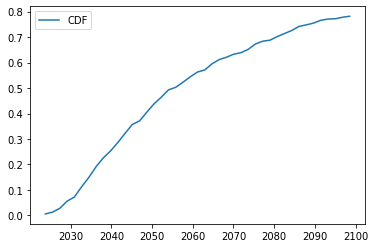

In [965]:
import matplotlib.pyplot as plt
%matplotlib inline

count, bins_count = np.histogram([2200 if t > 2200 else t for t in tai_years], bins=100)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
  
bins = [b for b in bins_count[1:] if b <= 2100]
plt.plot(bins, cdf[:len(bins)], label='CDF')
plt.legend()

## TODO

* Compare output to actual numbers (from Chinchilla, PaTH, etc.)
* Generate my numbers
* Documentation for the numbers